<a href="https://colab.research.google.com/github/BharatSingla12/Retail_Customer_Segmentation/blob/main/Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font size="+3" color='#cc0707'><b><u> Retail Customer Segmentation </u>
<font size="+1" color='#144c5c'><b>  Customer segmentation is very important because it helps market and sell products more effectively. It helps to develop a better understanding of your customer's needs and desires. Effective customer segmentation will help to increase customer lifetime value and increase their spending. 

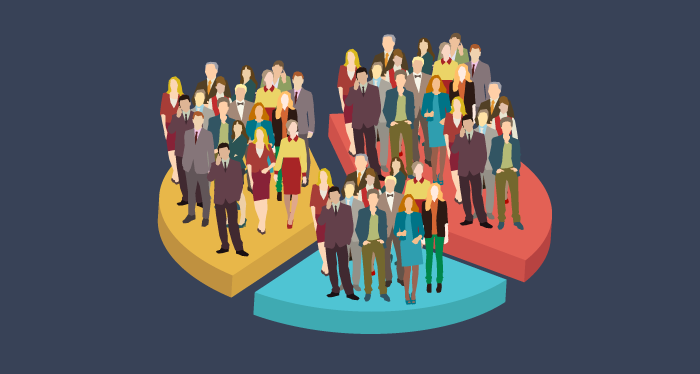

 <a href="https://onedrive.live.com/view.aspx?resid=C387FF99405739E7!3768&ithint=file%2cpptx&authkey=!AP6skmT41Vd4yOA" target="_blank"> <font size="+2" color='#cc0707'><b> Click here to watch the Persentation  </b> </a>    📊 

##   <font size="+2.5" color='#144c5c'><b><u> Project Description </u>



### <b> Problem Description </b>
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### <b>  Data Description </b> </font>

<table>
  <tr>
    <th><strong><b>Feature</b></strong></th>
    <th><strong><b>Description</b></strong></th>
  </tr>
  <tr>
    <td>InvoiceNo</td>
    <td>Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.</td>
  </tr>
  <tr>
    <td>StockCode</td>
    <td>Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.</td>
  </tr>
  <tr>
    <td>Description</td>
    <td>Product (item) name. Nominal.</td>
  </tr>
  <tr>
    <td>Quantity</td>
    <td>The quantities of each product (item) per transaction. Numeric.</td>
  </tr>
  <tr>
    <td>InvoiceDate</td>
    <td>Invoice Date and time. Numeric, the day and time when each transaction was generated.</td>
  </tr>
  <tr>
    <td>UnitPrice</td>
    <td>Unit price. Numeric, Product price per unit in sterling.</td>
  </tr>
  <tr>
    <td>CustomerID</td>
    <td>Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.</td>
  </tr>
  <tr>
    <td>Country</td>
    <td>Country name. Nominal, the name of the country where each customer resides.</td>
  </tr>
</table>

## <font size="+2.5" color='#144c5c'><b>  <u>Importing all the libraries</u>

In [2]:
!pip install squarify
!pip install downcast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# For data maupulation 
import pandas as pd 
import numpy as np
import datetime as dt

# For Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# For Clustering Algorithm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture


In [4]:
# To ignore irrelevent warnigns 
import warnings
warnings.filterwarnings('ignore')

# Plot setting 
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# For Printing 
from IPython.display import display

## <font size="+2.5" color='#144c5c'><b>  <u>Exploratory data analysis</u>

### Lets understand the Data 

In [5]:
# Load the data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1j-sNUmFzBYOqixfwhJA75hCDbeWG-7lG',encoding= 'unicode_escape')

# View it 
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [6]:
# Check the shape of the data
df.shape

(541909, 8)

In [7]:
# Get the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# Print all the columns present in the data
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
# Get the descriptive statistics
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [10]:
# Lets check for the unique value in each column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

**Conclusion**

- There are 541909 rows and 8 columns in the dataset.
- Unit price and Quantity are numerical columns. Country, InvoiceNo StockCode, and Description are categorical columns. InvoiceDate is date column in the dataset.
- The data has null values in Description and CustomerID columns.
- There are 4070 unique stockcode, 4372 customer ID, and 38 countries.
- From the description there are some negative values in quantity and unitprice column.

### Lets clean the Data

In [11]:
# Get the Percentage of the missing values in each column
100*df.isna().sum()/len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

From above, about 25% of Customer IDs are missing and without Customer IDs it make no sense, therefore it is good to delete rows in which customer ID is missing.

In [12]:
# Dropping the missing values from the Customer ID 
df = df.dropna(subset=['CustomerID'])

In [13]:
# Checking the number of the duplicate value in the dataset
df.duplicated().sum()

5225

In [14]:
# Dropping duplicate rows
df = df.drop_duplicates()

In [15]:
# Check the shape of the data
df.shape

(401604, 8)

In [16]:
# Checking the missing values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
# Determing % of orders canceled 
order_canceled  = 100*df['InvoiceNo'].str.contains('C').mean()
print(f'About {order_canceled} % of orders were canceled.')

About 2.209141343213713 % of orders were canceled.


In [18]:
# Dropping cancellations from the main dataframe
df = df[~df['InvoiceNo'].str.contains('C')]

In [19]:
# Converting the Invoice date to Date time datatype
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [20]:
# Change the customerIT type from float to int
df['CustomerID'] = df['CustomerID'].astype(int)

In [21]:
# Creating new features from the InvoiceDate
df["hour"]  = df["InvoiceDate"].dt.hour
df["day"]   = df["InvoiceDate"].dt.weekday # 0 for Monday
df["month"] = df["InvoiceDate"].dt.month
df["year"]  = df["InvoiceDate"].dt.year

In [22]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['revenue'] = df['Quantity']*df['UnitPrice']

In [23]:
# Lets view the data
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  hour  day  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom     8    2   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom     8    2   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom     8    2   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom     8    2   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom     8    2   

   month  year  revenue  
0     12  2010    15.30  
1     12  2010    20.34  
2     12  2010    22.00  
3     12  2010    20.34  
4     12  2010    20.34

In [24]:
# Lets view the data info now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
 8   hour         392732 non-null  int64         
 9   day          392732 non-null  int64         
 10  month        392732 non-null  int64         
 11  year         392732 non-null  int64         
 12  revenue      392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 41.9+ MB


In [25]:
# reduce the size of dataframe
from downcast import reduce
df = reduce(df) 

# Lets view the data info now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  category      
 1   StockCode    392732 non-null  category      
 2   Description  392732 non-null  category      
 3   Quantity     392732 non-null  int32         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float16       
 6   CustomerID   392732 non-null  int16         
 7   Country      392732 non-null  category      
 8   hour         392732 non-null  int8          
 9   day          392732 non-null  int8          
 10  month        392732 non-null  int8          
 11  year         392732 non-null  int16         
 12  revenue      392732 non-null  float32       
dtypes: category(4), datetime64[ns](1), float16(1), float32(1), int16(2), int32(1), int8(3)
memory usage: 15.9 MB


### Exploratory Data Analysis

#### Defining Functions

In [26]:
# Combine Distribution Plot
def VoBoSt_plot(DATA, Y= None, X = None):
    # Create violin plots without mini-boxplots inside.
    ax = sns.violinplot(y=Y, x=X, data=DATA, 
                        cut=0, inner=None)
    # Clip the right half of each violin.
    for item in ax.collections:
        x0, y0, width, height = item.get_paths()[0].get_extents().bounds
        item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                        transform=ax.transData))

    # Create strip plots with partially transparent points of different colors depending on the group.
    num_items = len(ax.collections)
    sns.stripplot(y=Y, x=X, data=DATA, alpha=0.8, size=3,linewidth=0.07)

    # Shift each strip plot strictly below the correponding volin.
    for item in ax.collections[num_items:]:
        item.set_offsets(item.get_offsets() + 0.15)
    # Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
    sns.boxplot(y=Y, x=X, data=DATA, width=0.25,
                showfliers=True, showmeans=True, 
                meanprops=dict(marker='o', markerfacecolor='black',
                            markersize=6, zorder=3),
                boxprops=dict(facecolor=(0,0,0,0), 
                            linewidth=2, zorder=3),
                whiskerprops=dict(linewidth=2),
                capprops=dict(linewidth=2),
                medianprops=dict(linewidth=2)) 


In [27]:
numerical_columns   = ['Quantity', 'UnitPrice', 'revenue']
categorical_columns = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']
datetime_columns    = ['InvoiceDate', 'hour', 'day', 'month', 'year']

#### Transaction Analysis

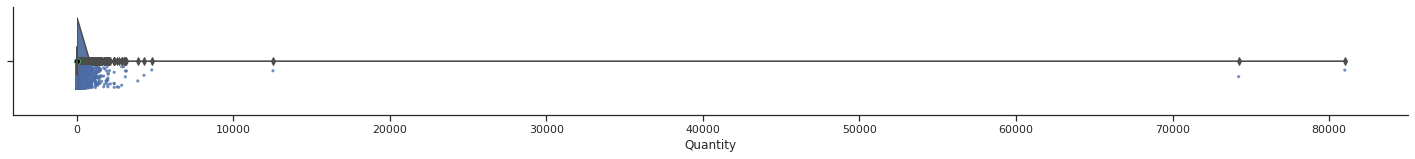

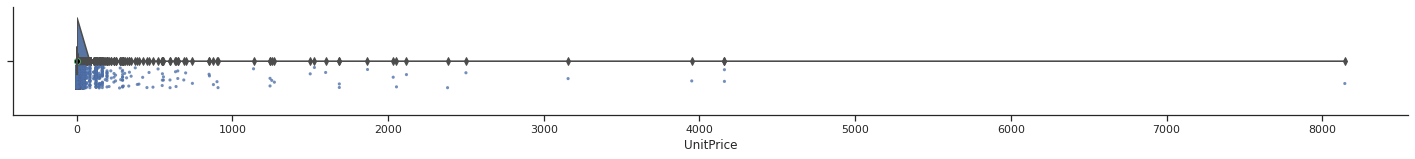

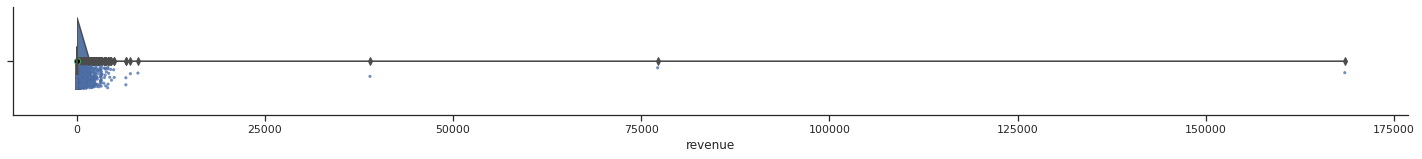

In [28]:
# Plot graph
numerical_columns   = ['Quantity', 'UnitPrice', 'revenue']
df_trans = df[numerical_columns].astype(np.float32)
for col in numerical_columns:
    plt.figure(figsize=(25,2))
    VoBoSt_plot(DATA = df_trans, X = col)
    plt.show()

Quantity, Unitprice, and revenue columns have outliers in them. It means for some transaction, the quantity, unitprice and revenue have very high value.

#### StockCode Analysis

In [29]:
# Create dataframe for Number of transaction per stock code
df_stockcode = df['StockCode'].value_counts().reset_index().sort_values(by=["index"], ignore_index=True ) 
df_stockcode = df_stockcode.rename(columns={'index': 'Stock Code', 'StockCode':'Number of Transaction'})
# Create dataframe for total quantity ordered per stock code
df_stockcode['Total Quantity'] = df.groupby(['StockCode'], as_index = False)['Quantity'].sum()['Quantity']
# Create dataframe for total revenue per stock code
df_stockcode['Total Revenue'] = df.groupby(['StockCode'], as_index = False)['revenue'].sum()['revenue']
# Create dataframe for average unit price per stock code
df_stockcode['Average unit price'] = df.groupby(['StockCode'], as_index = False)['UnitPrice'].mean()['UnitPrice'].astype(np.float32)
# View it
df_stockcode.head()

Stock Code  Number of Transaction  Total Quantity  Total Revenue  \
0      10002                     49             823     699.549988   
1      10080                     21             291     114.409996   
2      10120                     29             192      40.320000   
3     10123C                      3               5       3.250000   
4     10124A                      5              16       6.720000   

   Average unit price  
0            0.850098  
1            0.411865  
2            0.209961  
3            0.649902  
4            0.419922

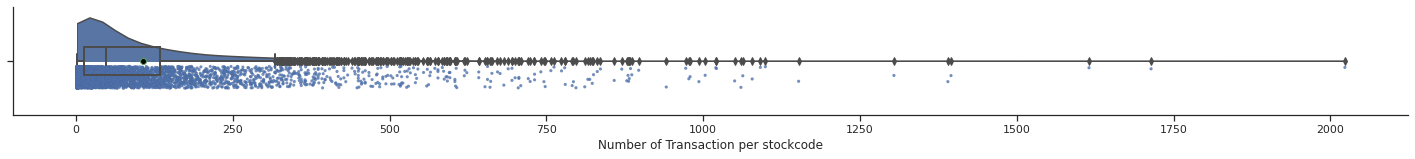

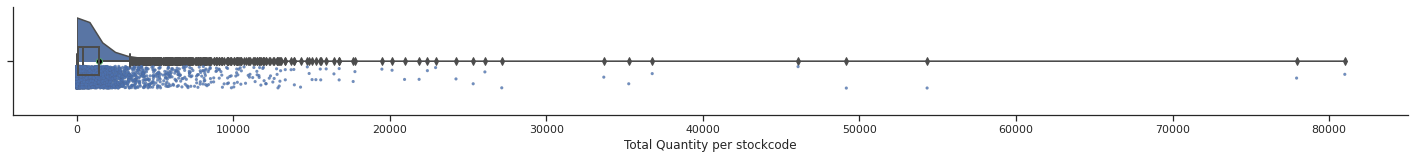

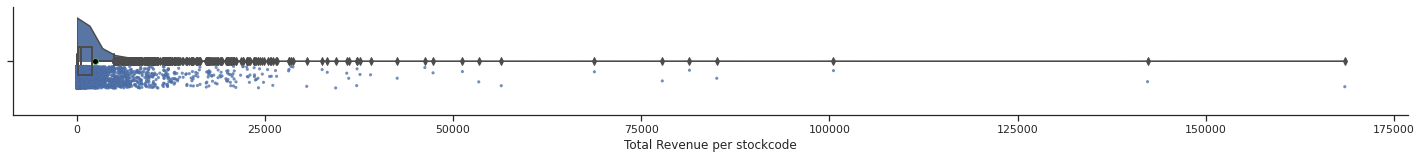

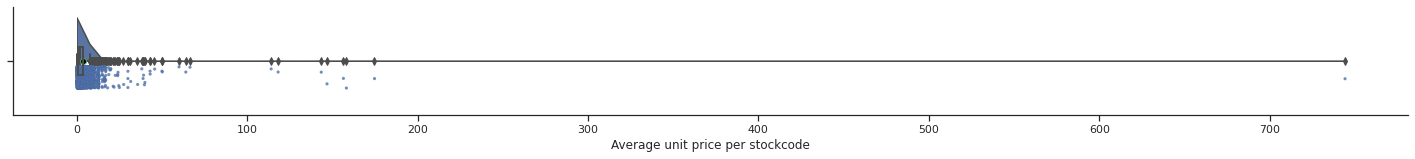

In [30]:
# Plot graph
for col in df_stockcode.columns[1:]:
    plt.figure(figsize=(25,2))
    VoBoSt_plot(DATA = df_stockcode, X = col)
    plt.xlabel(f"{col} per stockcode")
    plt.show()

All the above data are right skewed and have outliers in it. It means there are some stock codes for which number of transaction, total quanitity, total revenue, and average unit price are very high. 

- Outliers in Number of transaction per stock code tells that some products are ordered more frequent.
- Outliers in total quantity per stock code tells that for some products total ordered quantity is very high.
- Outliers in total revenue per stock code tells that for some products generating very high revenue.
- Outliers in average unit price per stock code tells that the price of some products is very high.

#### CustomerID Analysis

In [31]:
# Create column for Number of transaction per Customer ID
df_CustomerID = df['CustomerID'].value_counts().reset_index().sort_values(by=["index"], ignore_index=True ) 
df_CustomerID = df_CustomerID.rename(columns={'index': 'Customer', 'CustomerID':'Number of Transaction'})
# Create column for Number of products ordered per Customer ID
df_CustomerID['Products Count'] = df.groupby(['CustomerID'], as_index = True)['StockCode'].apply(lambda x : len(set(x))).reset_index(drop=False).sort_values(by="CustomerID")['StockCode']
# Create column for total revenue generated per Customer ID
df_CustomerID['Total Revenue'] = df.groupby(['CustomerID'], as_index = False)['revenue'].sum().sort_values(by="CustomerID")['revenue']
# View it 
df_CustomerID.head()

Customer  Number of Transaction  Products Count  Total Revenue
0     12346                      1               1   77183.601562
1     12347                    182             103    4310.000000
2     12348                     31              22    1797.239990
3     12349                     73              73    1757.550049
4     12350                     17              17     334.399994

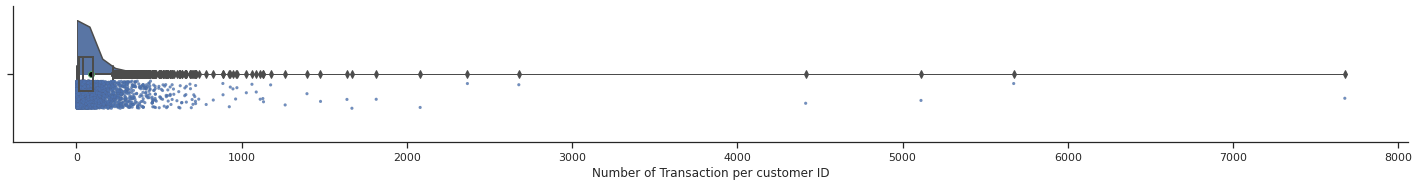

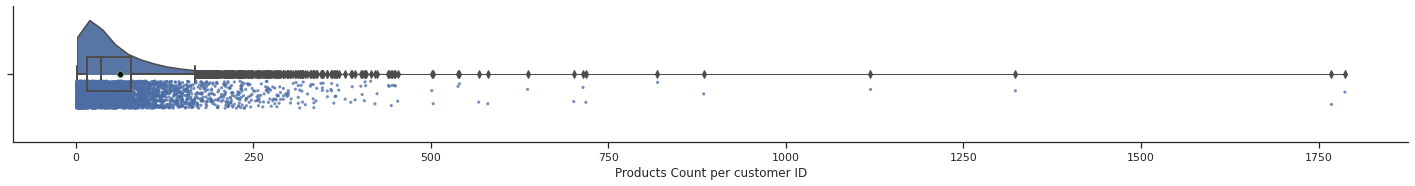

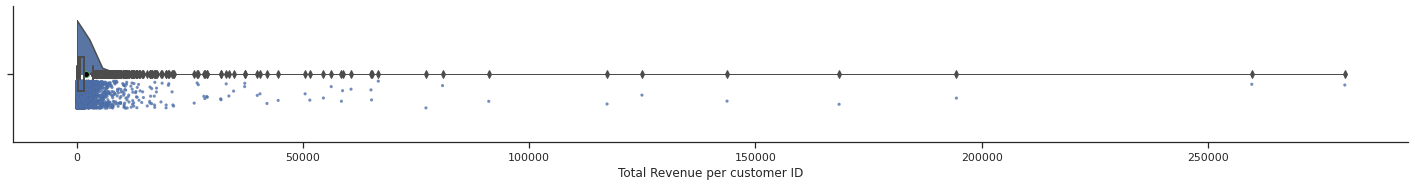

In [32]:
# Plot graph
for col in df_CustomerID.columns[1:]:
    plt.figure(figsize=(25,2.5))
    VoBoSt_plot(DATA = df_CustomerID, X = col)
    plt.xlabel(f"{col} per customer ID")
    plt.show()

All the above data are right skewed and have outliers in it. It make following conclusions.

- Outliers in Number of transaction per customer id tells that some customers are ordering very high frequently.
- Outliers in Products count per customer id tells that for some customers ordering a wide range of products.
- Outliers in total revenue per customer id tells that for some customers are generating very high revenue.

#### Date Time Analysis

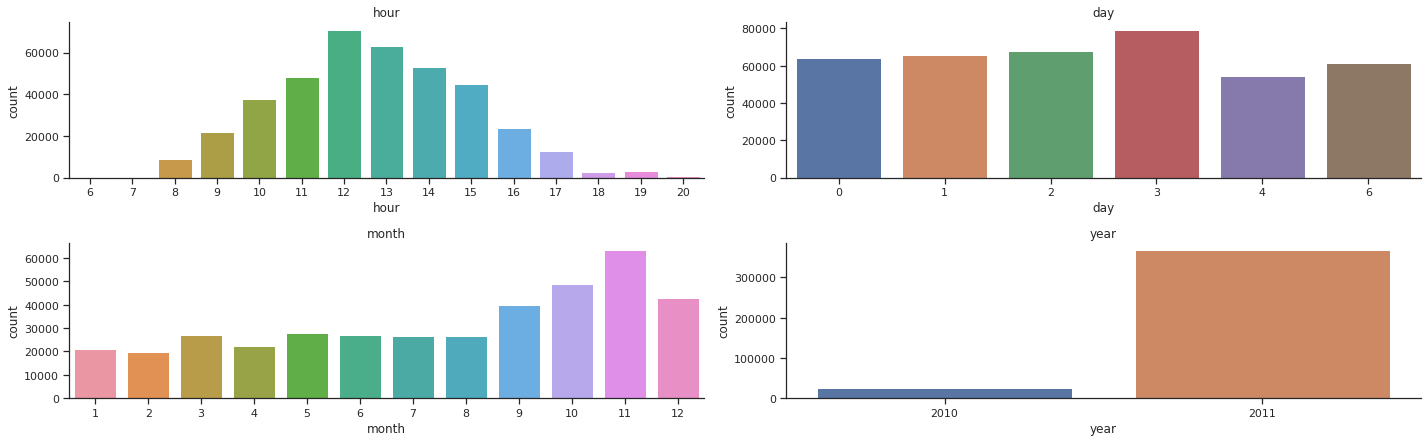

In [33]:
# Plotting top values based on frequency in each column
datetime_columns    = ['InvoiceDate', 'hour', 'day', 'month', 'year']
plt.figure(figsize=(20,15))
for n,col in enumerate(datetime_columns[1:]):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index()
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.title(col)
  plt.tight_layout()

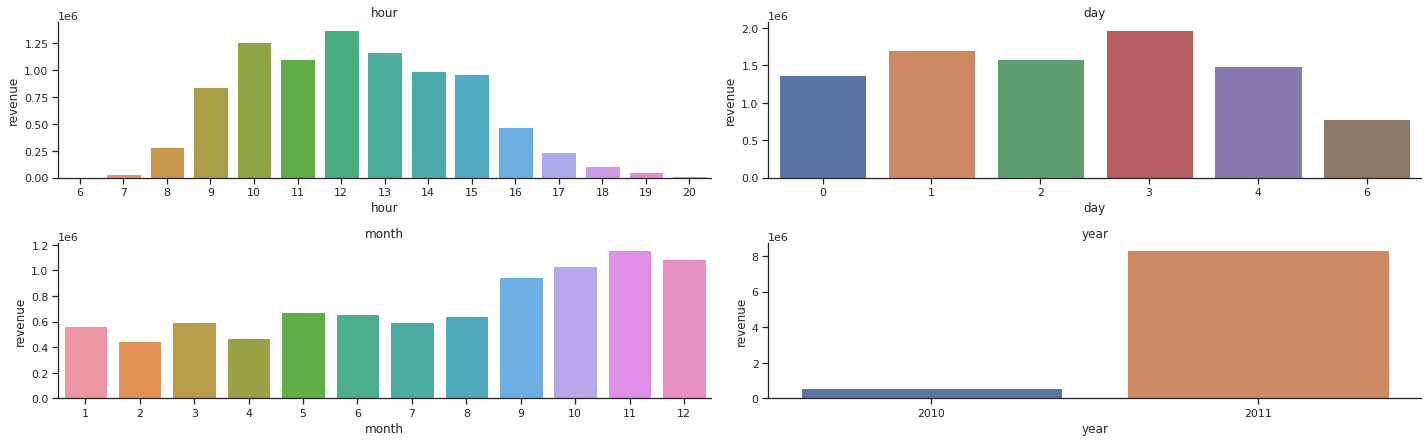

In [34]:
# Plotting top values based on frequency in each column
datetime_columns    = ['InvoiceDate', 'hour', 'day', 'month', 'year']
plt.figure(figsize=(20,15))
for n,col in enumerate(datetime_columns[1:]):
    plt.subplot(5, 2, n+1)
    temp = df.groupby([col], as_index = False)['revenue'].sum().sort_values(by=col)
    sns.barplot(x=col ,y='revenue', data=temp).set(title=col.title())
    plt.title(col)
    plt.tight_layout()

- The number of transactions and revenue gradually increases from 6 AM to 12 Noon and then gradually decreases from 12 Noon to 20 PM. There is no transaction between 20 PM to 6 AM in the morning.
- The number of transactions and revenue on sunday(day 6) is comparatively low as compared to other days.
- There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
- The number of transactions and revenue increases in the last 4 months of a year.
- The number of transactions and revenue increased by a good volume from 2010 to 2011 The below columns are very highly positively correlated to target columns. It means the higher value of the columns below supports bankruptcy.

#### Region Analysis

In [35]:
# Create dataframe for stock code
df_Country = df['Country'].value_counts().reset_index().sort_values(by=["index"], ignore_index=True ) 
df_Country = df_Country.rename(columns={'index': 'country', 'Country':'Number of Transaction'})
df_Country['Products Count'] = df.groupby(['Country'], as_index = True)['StockCode'].apply(lambda x : len(set(x))).reset_index(drop=False).sort_values(by="Country")['StockCode']
df_Country['Customer Count'] = df.groupby(['Country'], as_index = True)['CustomerID'].apply(lambda x : len(set(x))).reset_index(drop=False).sort_values(by="Country")['CustomerID']
df_Country['Total Revenue'] = df.groupby(['Country'], as_index = False)['revenue'].sum().sort_values(by="Country")['revenue'].astype(int)

df_Country.head()

country  Number of Transaction  Products Count  Customer Count  \
0  Australia                   1184             599               9   
1    Austria                    398             306              11   
2    Bahrain                     17              16               2   
3    Belgium                   2031             777              25   
4     Brazil                     32              32               1   

   Total Revenue  
0         138453  
1          10198  
2            548  
3          41196  
4           1143

In [36]:
# Top 5 Country by total customers 
df_Country.sort_values(by=["Customer Count"], ascending = False)[['country', 'Customer Count']].head()

country  Customer Count
35  United Kingdom            3921
14         Germany              94
13          France              87
30           Spain              30
3          Belgium              25

In [37]:
# Percentage of total customers in united kingdom
100*(3921/df['CustomerID'].nunique())

90.36644388107858

In [38]:
# Top 5 Country by Total Revenue
df_Country.sort_values(by=["Total Revenue"], ascending = False)[['country', 'Total Revenue']].head()

country  Total Revenue
35  United Kingdom        7285024
23     Netherlands         285446
10            EIRE         265262
14         Germany         228678
13          France         208934

In [39]:
# Top 5 Country by total Number of Transaction	
df_Country.sort_values(by=["Number of Transaction"], ascending = False)[['country', 'Number of Transaction']].head()

country  Number of Transaction
35  United Kingdom                 349227
14         Germany                   9027
13          France                   8327
10            EIRE                   7228
30           Spain                   2480

In [40]:
# Showing Number of orders by each country in world map
data = dict(type='choropleth',
            locations = df_Country['country'],
            locationmode = 'country names',
            z = df_Country['Number of Transaction'],
            text = df_Country['country'],
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)


layout = dict(title={'text': "Number of orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

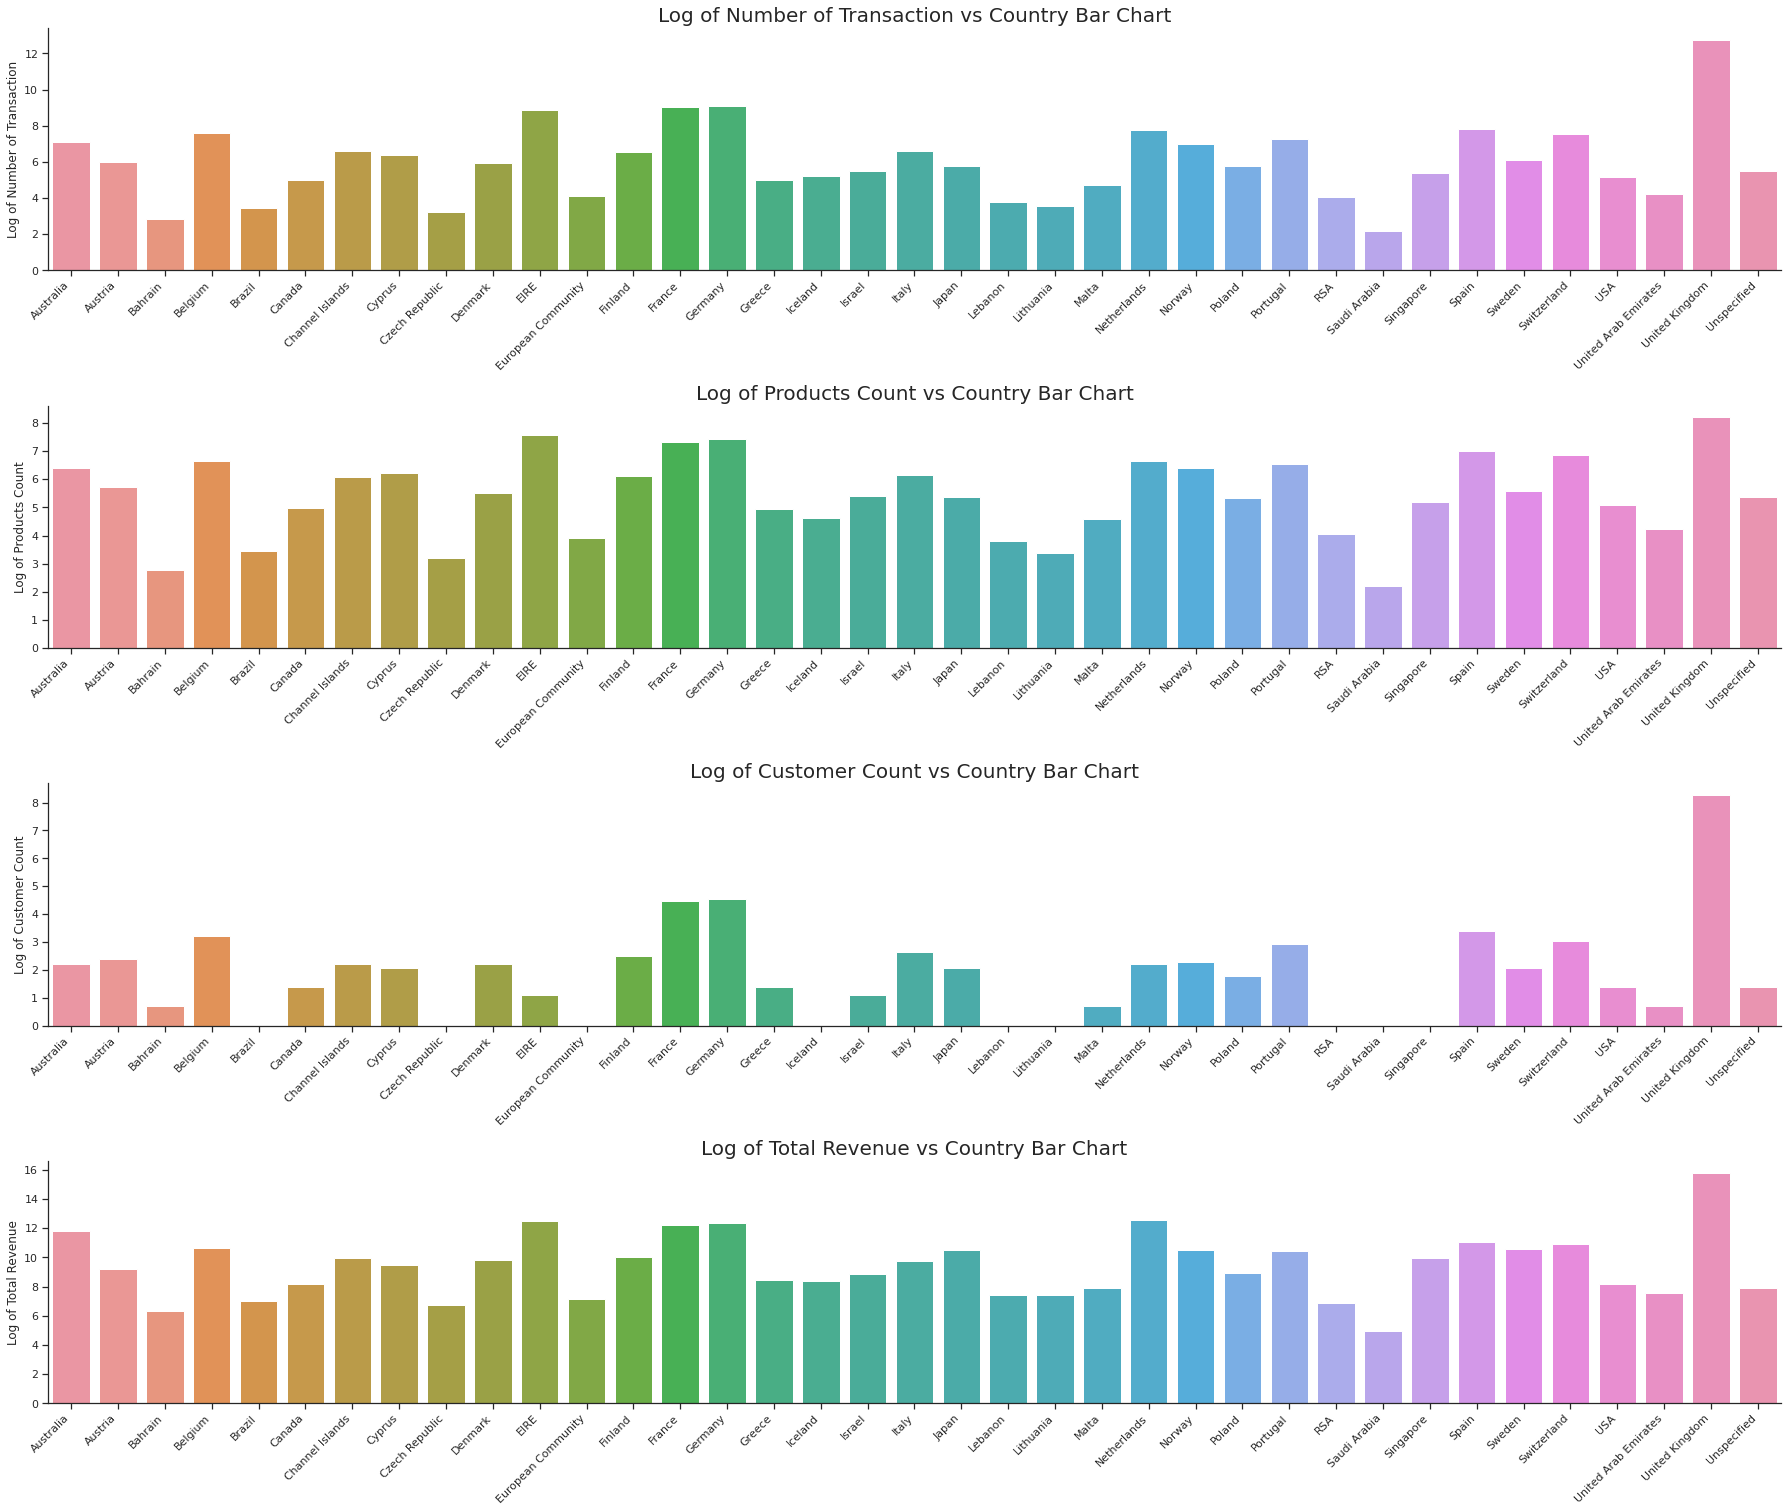

In [41]:
# Plotting top values based on frequency in each column
plt.figure(figsize=(25,25))
for n,col in enumerate(df_Country.columns[1:]):
    plt.subplot(5, 1, n+1)
    temp = df_Country.copy(deep = True).sort_values(by=[col]).reset_index()
    ax = sns.barplot(x=temp['country'] ,y=np.log(temp[col]))
    plt.xticks(rotation=45,ha='right')
    plt.ylabel(f"Log of {col}")
    plt.xlabel("")
    plt.title(f"Log of {col} vs Country Bar Chart", {'fontsize': 20})
    plt.tight_layout()

1.	United Kingdom has the greatest number of customers therefore the total revenue and total orders are also high for the United Kingdom.
2.	About 90% of total customers belong to the United Kingdom.
3.	United Kingdom, Germany, France, Spain, and Belgium are the top 5 countries by customer counts.
4.	United Kingdom, Netherlands, EIRE, Germany, and France are the top 5 countries by Total Revenue.
5.	United Kingdom, Germany, France, EIRE, and Spain are the top 5 countries by the Total number of orders.

## <font size="+2.5" color='#144c5c'><b>  <u>RFM analysis for Customer Segmentation</u>

RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the three factors RECENCY, Frequency, and Monetary. 
1. Recency: How recently did the customer make a purchase? If they made a purchase recently, the likelihood of them making another purchase is high. However, if the customer hasn't made a purchase in a while, you may need to nurture them with new promotional offers or even reintroduce your brand.

2. Frequency: How often does the customer make purchases? If they purchase often, you'll know their spending habits and preferences, but if they make one purchase and never return, they could be a good candidate for a customer satisfaction survey.

3. Monetary Value: How much do your customers spend per purchase? Don't get too caught up on the number here, though — all purchases are valuable. However, the first two letters in the RFM acronym can be visualized more clearly by this third component. If they've made many recent purchases at a high price point, you've got a returning customer that can turn into a brand loyalist.

The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

 ### Feature Engineering - Building features for RFM model

#### Recency
We fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we calculate the days difference between the most recent transaction carried out by the customer and this reference date.

In [42]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
refrence_date = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
RFM_df = df.groupby('CustomerID',as_index = False )['InvoiceDate'].apply(lambda x: (refrence_date - x.max()).days).sort_values(by= 'CustomerID')

# Renaming the columns
RFM_df.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)

#### Frequency
It is defined as the number of times a customer make purchases. It can be calulated by determing the number of invoices per customer ID.

In [43]:
# Calculate Frequency
RFM_df['Frequency'] = df[['CustomerID','InvoiceNo']].groupby('CustomerID',as_index = False ).count().sort_values(by= 'CustomerID')['InvoiceNo']

#### Monetary value
How much money customers have spend on purchasing products.


In [44]:
# Calculate Monetary
RFM_df['Monetary'] = df[['CustomerID', 'revenue']].groupby('CustomerID').sum().sort_values(by= 'CustomerID').reset_index()['revenue']
# view it 
RFM_df.head()

CustomerID  Recency  Frequency      Monetary
0       12346      326          1  77183.601562
1       12347        2        182   4310.000000
2       12348       75         31   1797.239990
3       12349       19         73   1757.550049
4       12350      310         17    334.399994

 ### RFM Analysis

In [45]:
# View it
RFM_df.head()

CustomerID  Recency  Frequency      Monetary
0       12346      326          1  77183.601562
1       12347        2        182   4310.000000
2       12348       75         31   1797.239990
3       12349       19         73   1757.550049
4       12350      310         17    334.399994

In [46]:
# Describe it 
RFM_df[['Recency', 'Frequency', 'Monetary']].describe().T

count         mean          std  min         25%         50%  \
Recency    4339.0    92.518322   100.009747  1.0   18.000000   51.000000   
Frequency  4339.0    90.512100   225.515328  1.0   17.000000   41.000000   
Monetary   4339.0  2048.216064  8984.248047  0.0  306.455002  668.559998   

                   75%           max  
Recency     142.000000     374.00000  
Frequency    98.000000    7676.00000  
Monetary   1660.315002  280206.03125

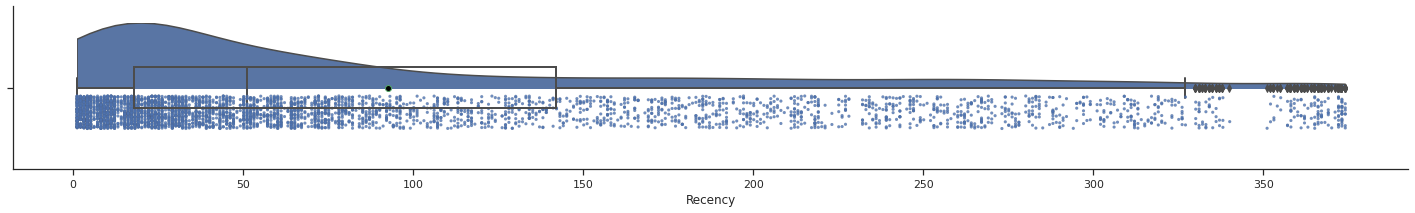

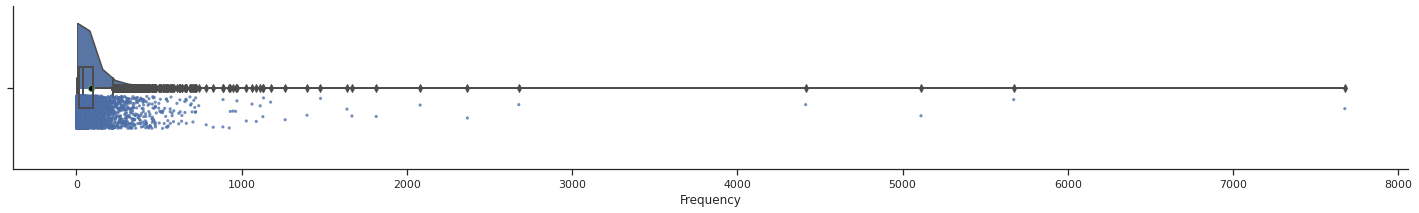

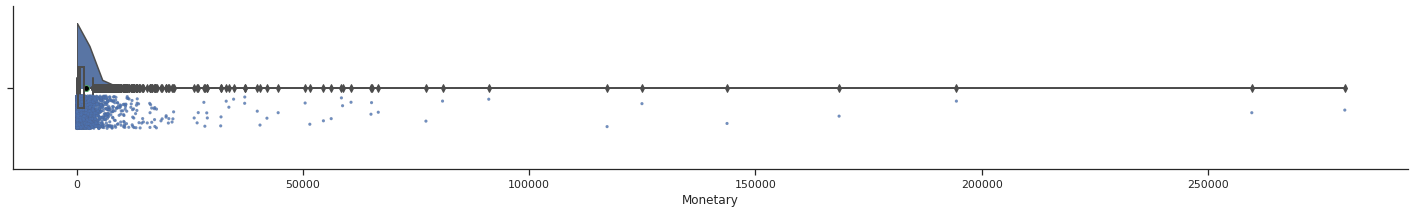

In [47]:
# Plot graph
for col in RFM_df.columns[1:]:
    plt.figure(figsize=(25,3))
    VoBoSt_plot(DATA = RFM_df, X = col)
    plt.show()

Columns Recency, Frequency and Monetary are right skewed and thus have outlier in them. In order to visualize cluster properly and create proper clusters, we need to treat outliers.

In [48]:
# Function to get amount of outliers in numerical columns
def outlier_prcnt(df, col_list):
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-3*iqr
        fence_high = q3+3*iqr

        # Print total outlers and percentage using IQR method
        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"Total outer outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

# Lets get the amount of outliers in each numerical columns
outlier_prcnt(RFM_df, ['Recency', 'Frequency', 'Monetary'])

Total outer outliers in Recency are: 0 - 0.0%.
Total outer outliers in Frequency are: 179 - 4.13%.
Total outer outliers in Monetary are: 222 - 5.12%.


The higher outliers from Frequency and Monetary columns are fixed by capping the outliers that are above Q3 + 3*IQR. A total of 4.13% in Frequency and 5.12% in Monetary are capped using this method.

In [49]:
# Removing high value outliers from Frequency and Monetary by capping the top 1% values 
for col in ['Frequency', 'Monetary']:
    q1 = RFM_df[col].quantile(0.25)
    q3 = RFM_df[col].quantile(0.75)
    iqr = q3-q1  #Interquartile range
    upper_limit = q3+3*iqr
    RFM_df[col] = np.where(RFM_df[col] > upper_limit, upper_limit, RFM_df[col]) 

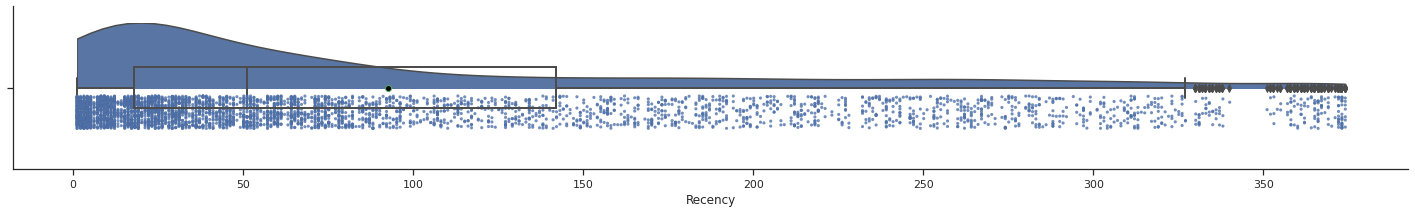

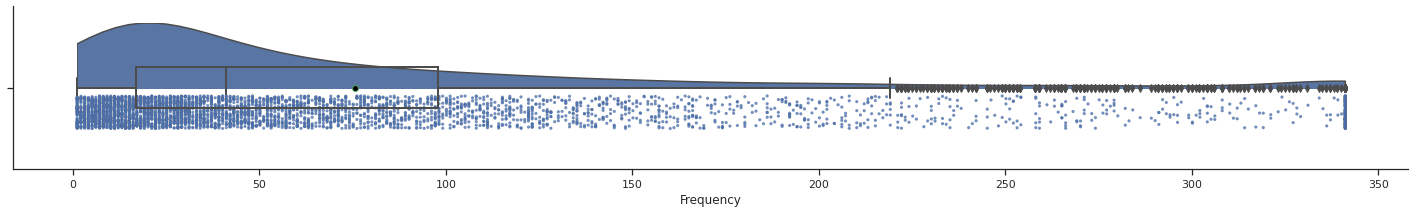

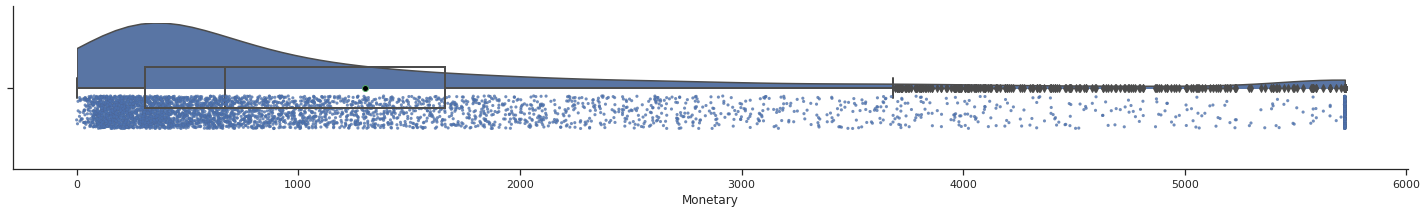

In [50]:
# Plot graph
for col in RFM_df.columns[1:]:
    plt.figure(figsize=(25,3))
    VoBoSt_plot(DATA = RFM_df, X = col)
    plt.show()

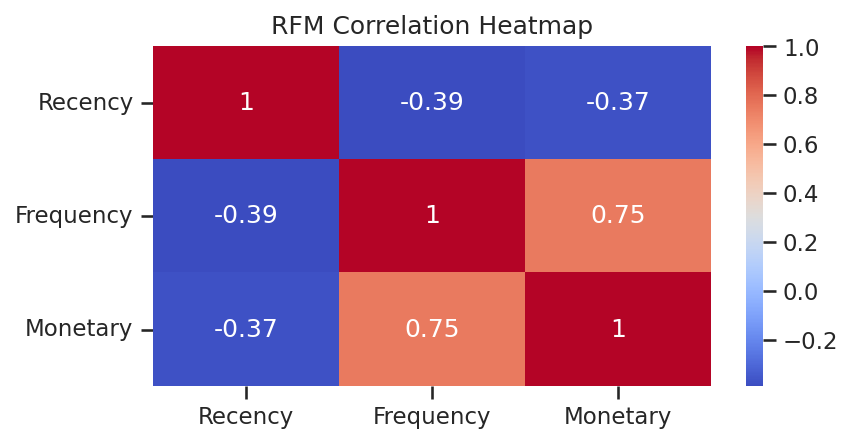

In [51]:
# Visualizing the correlations among features.
target =  ['Recency', 'Frequency', 'Monetary']
plt.figure(figsize = (6, 3),dpi=150)
sns.heatmap(RFM_df[target].corr(), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

*	Columns Recency, Frequency and Monetary are right-skewed and thus have outliers in them. To visualize clusters properly and create proper clusters, we need to treat outliers.
*	Frequency and Monetary are highly positively correlated (0.75). Recency has a moderate negative correlation with Frequency (-0.39) and Monetary (-0.37).


For a clustering algorithm, it is important to scale all the features on the same scale before applying any clustering algorithm. Since the data still have so many outliers in them, therefore robust scaling from sklearn is used instead of min-max scaling or standard scaling. 

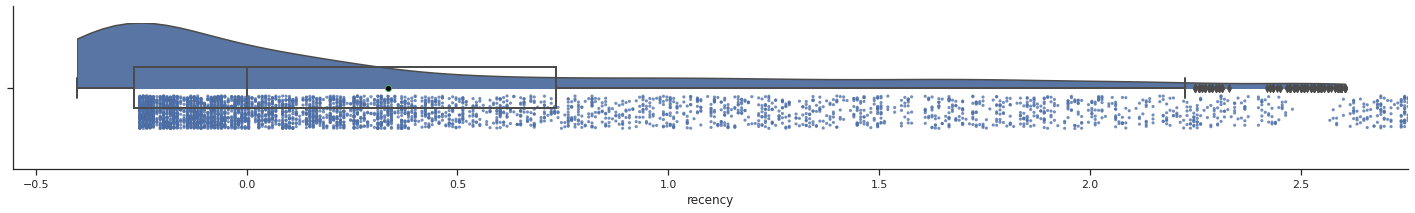

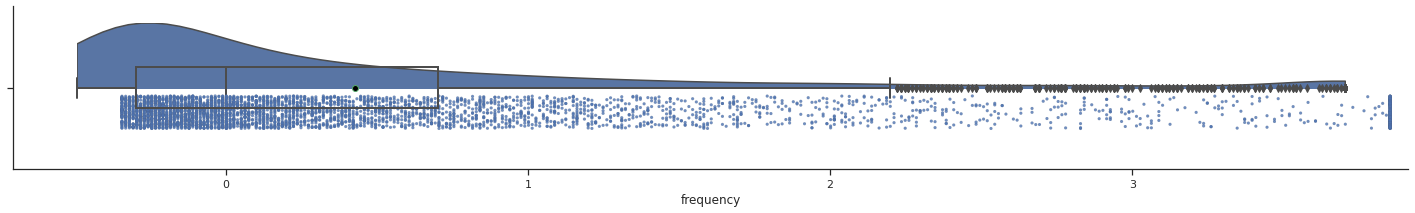

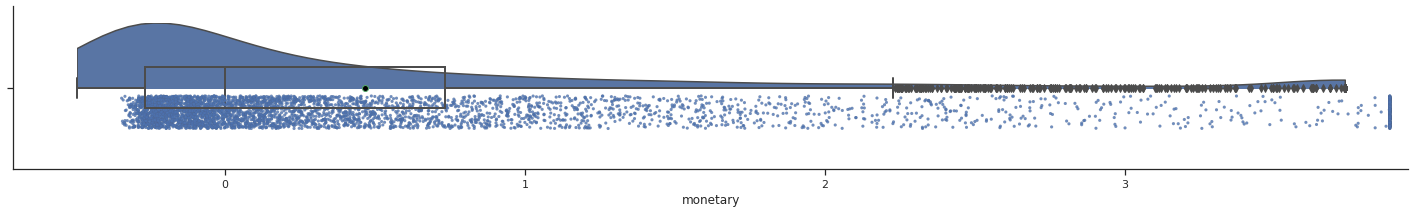

In [52]:
# Scale the variabels 
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
target = ['recency', 'frequency', 'monetary']
Actual = ['Recency', 'Frequency', 'Monetary']
RFM_df[target] = transformer.fit_transform(RFM_df[Actual])

# Plot graph
target = ['recency', 'frequency', 'monetary']
for col in target:
    plt.figure(figsize=(25,3))
    VoBoSt_plot(DATA = RFM_df, X = col)
    plt.show()

## <font size="+2.5" color='#144c5c'><b>  <u>Applying Clustering Algorithms </u>
1.	Each Customer ID is assigned to a cluster based on its recency, frequency, and monetary features by applying clustering models.
2.	Each cluster is assigned a recency score, frequency score, and monetary score based on the average value, distribution, and visualization of recency, frequency, and monetary of customer IDs of that cluster.
3.	RFM score and RFM group is calculated by recency score, frequency score, and monetary score.
4.	Each RFM group is then mapped to their corresponding segmentation group based on its property.
5.	The final segment is then visualized and analyzed by tree map, bar plot, and distribution plots. 

### **Prerequisites**

In [53]:
# Function to plot tree map
def segration_map(rfm):
    '''
    -> This function is to plot square map using squarify lib
    -> rfm must contain segment column
    '''
    # determine frequency of each segment 
    segments = rfm['segment'].value_counts().sort_values(ascending = False)
    # Plot the tree map
    fig = plt.gcf()
    ax = fig.add_subplot()
    fig.set_size_inches(16, 10)
    squarify.plot(sizes=segments,
                label=segments.index,
                color=['#AFB6B5', '#F0819A', '#926717', '#F0F081', '#81D5F0',
                        '#C78BE5', '#748E80', '#FAAF3A', '#7B8FE4', '#86E8C0'],
                pad = False,
                bar_kwargs = {'alpha': 1},
                text_kwargs = {'fontsize':12})
    plt.title("Customer Segmentation Map", fontsize = 20)
    plt.show()

# Plot 3D Cluster 
def Three_D_Plot(Recency, Frequency, Monetary, y):
    plt.figure(figsize = (18, 8))
    # Set up axes
    ax = plt.axes(projection ="3d")
    # Name labels
    ax.set_xlabel('Recency', fontweight ='bold')
    ax.set_ylabel('Frequency', fontweight ='bold')
    ax.set_zlabel('Monetary', fontweight ='bold')
    #  Setting main title
    ax.set_title("3D Cluster Visualization", fontweight ='bold')
    # Plotting scatter plot in 3 dimensions
    ax = ax.scatter(Recency, Frequency, Monetary ,c=y,cmap='rainbow')
    # positioning legend
    plt.legend(*ax.legend_elements(),prop={'size': 15})
    plt.show()

# Plot three scatter plots of 3D cluster 

def Plot_3subplots(rfm, hue = 'cluster'):
    fig, axes = plt.subplots(1, 3, figsize = (18, 5))
    fig.suptitle('RFM Cluster Analysis')
    sns.scatterplot(data=rfm, x= 'Recency', y= 'Frequency' , hue = rfm[hue], ax = axes[0], palette="deep")
    sns.scatterplot(data=rfm, x= 'Recency', y= 'Monetary', hue = rfm[hue], ax = axes[1], palette="deep")
    sns.scatterplot(data=rfm, x= 'Frequency', y= 'Monetary'  , hue = rfm[hue], ax = axes[2], palette="deep")
    plt.tight_layout()
    plt.show()


# 75% Confidence Interval
def Confidence_Interval_75(x):
    lower = round(x.quantile(0.25))
    upper = round(x.quantile(0.75))
    return f'{lower} to {upper}'

# Median after rounding 
def Median(x):
    return round(x.median())

# Mean after rounding 
def Mean(x):
    return round(x.mean())

In [54]:
# Add theme to pandas table 
List_of_style_for_table = [
    {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]},
    {'selector': 'th', 'props': 'background-color: #000066; color: white;'},
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'}

]

In [55]:
# Create dictionary for conclusion report 
Conclusion_report = dict()

### **Defination of Segments**

Based on the recency score, frequency score, and monetary score of a customer or a cluster, a particular segment can be assigned to it. The definition and visualization chart of segments are as given below.

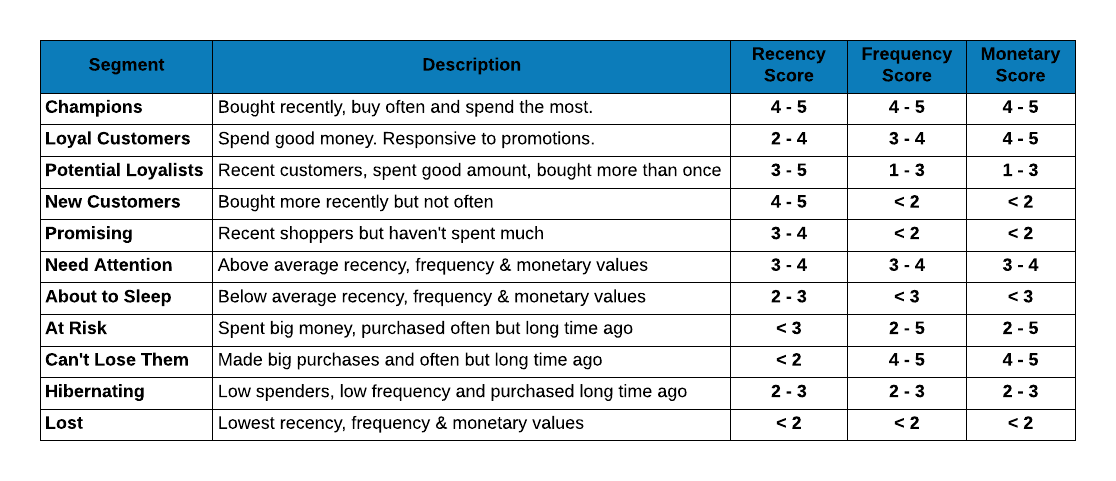

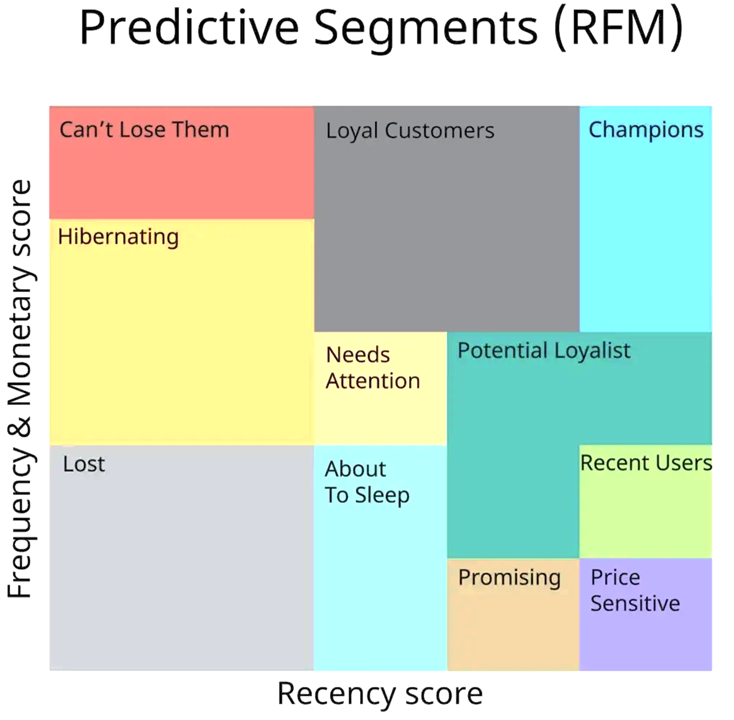

### **Quantile CUT**

#### Creating Clusters

In [151]:
# Copy data frame for creating clusters
rfm = RFM_df.copy(deep = True)

# Calculate RFM Scores
def get_rfm_scores(dataframe):
    
    df_ = dataframe.copy()
    df_['recency_score'] = pd.qcut(df_['recency'],5,labels = [5, 4, 3, 2, 1])
    df_['frequency_score'] = pd.qcut(df_['frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
    df_['monetary_score'] = pd.qcut(df_['monetary'], 5, labels = [1, 2, 3, 4, 5])
    df_['RFM_SCORE'] = (df_['recency_score'].astype(str) + df_['frequency_score'].astype(str))
    
    return df_
rfm = get_rfm_scores(rfm)

# Segmentation
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new\ncustomers',
           r'[4-5][2-3]': 'potential\nloyalists',
           r'5[4-5]': 'champion'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

# View it
rfm.head()

CustomerID  Recency  Frequency     Monetary   recency  frequency  monetary  \
0       12346      326        1.0  5721.895020  2.217742  -0.493827  3.732539   
1       12347        2      182.0  4310.000000 -0.395161   1.740741  2.689672   
2       12348       75       31.0  1797.239990  0.193548  -0.123457  0.833676   
3       12349       19       73.0  1757.550049 -0.258065   0.395062  0.804359   
4       12350      310       17.0   334.399994  2.088710  -0.296296 -0.246820   

  recency_score frequency_score monetary_score RFM_SCORE          segment  
0             1               1              5        11      hibernating  
1             5               5              5        55         champion  
2             2               3              4        23          at_Risk  
3             4               4              4        44  loyal_customers  
4             1               2              2        12      hibernating

#### Visualization and Statistics

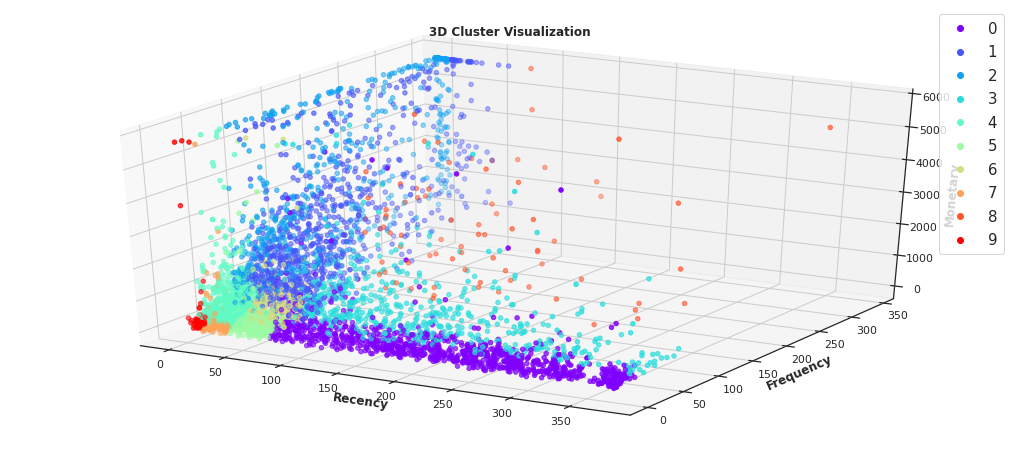

In [152]:
# Create rank for visualizing segments
mapping = dict(zip(rfm['segment'].value_counts().index, range(len(rfm['segment'].value_counts()))))
rfm['segment_rnk'] = rfm['segment'].map(mapping)

# Plot 3D visualization 
Three_D_Plot(Recency = rfm[Actual].iloc[:, 0], Frequency= rfm[Actual].iloc[:, 1], Monetary= rfm[Actual].iloc[:, 2], y=rfm['segment_rnk'])

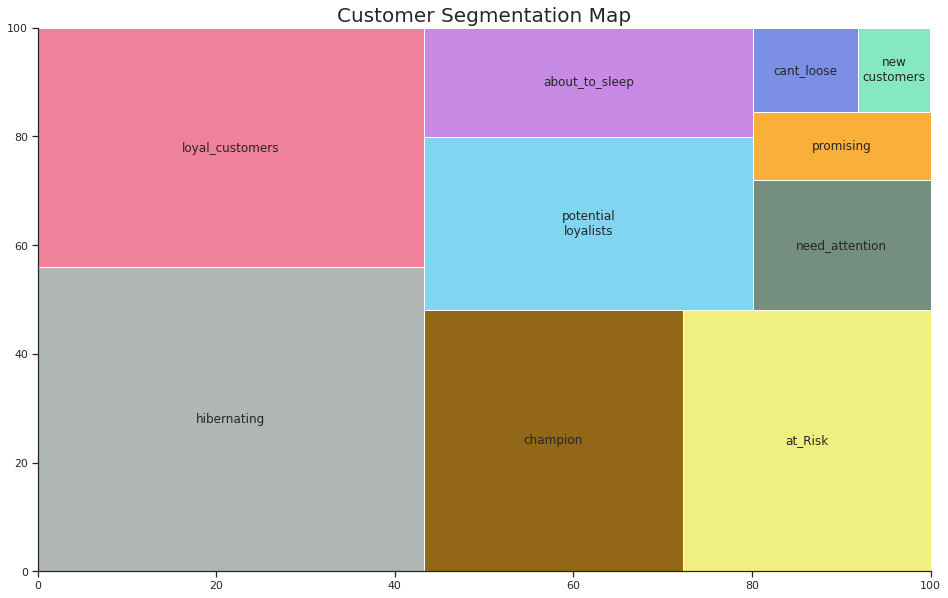

In [153]:
# Plot the segmentation Map
segration_map(rfm)

In [158]:
# Get descriptive statistics of final segments
rfm_stats = rfm[Actual+['segment']].groupby('segment').agg({Confidence_Interval_75, 'count', Mean})
rfm_stats.rename(columns = {'Confidence_Interval_75': '75% Confidence Interval'}, inplace =True)
# Print it using style function
Conclusion_report['Quantile cut'] = rfm_stats.style.set_table_styles(List_of_style_for_table)
display(Conclusion_report['Quantile cut'])

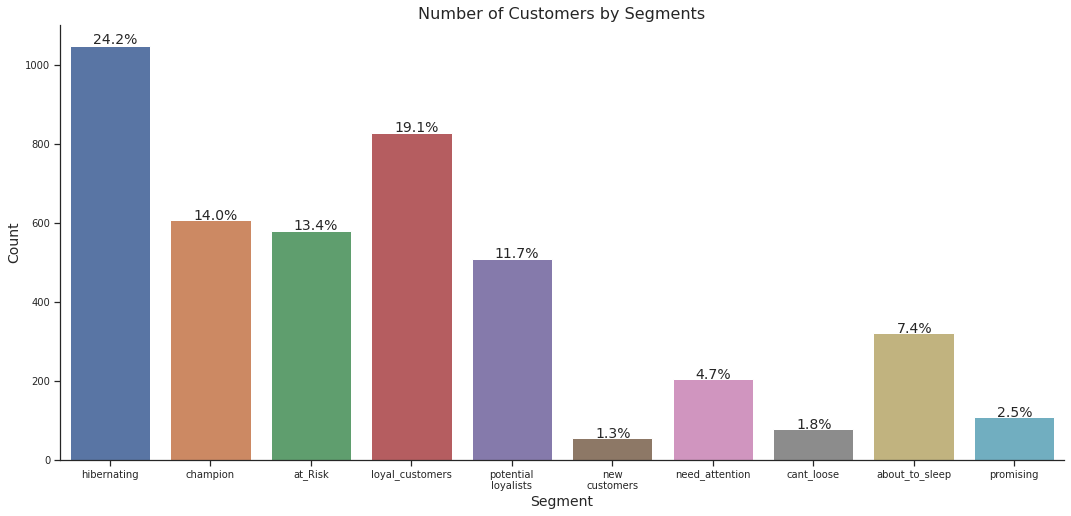

In [155]:
# Visualize the number customer by segments
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment')
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

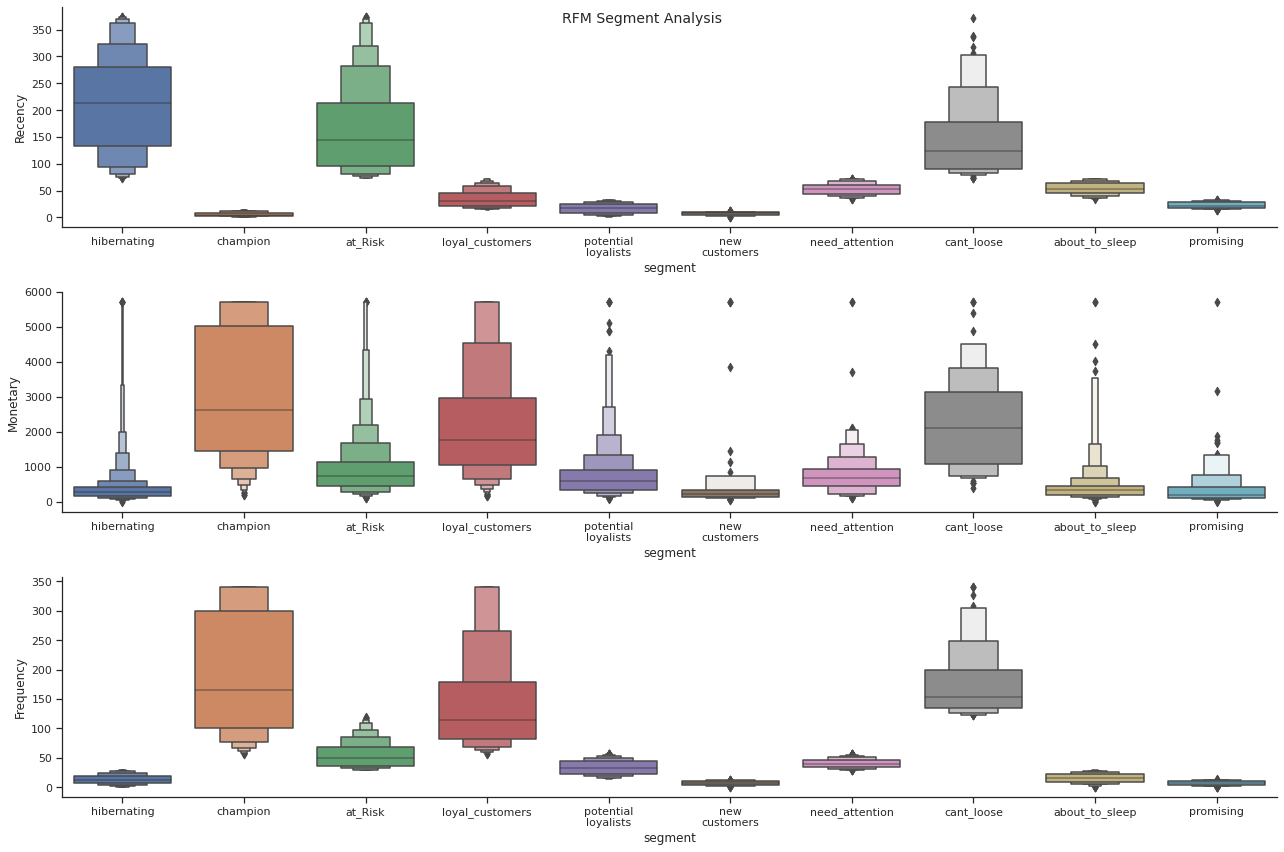

In [156]:
# Visualize the distribution of segments
fig, axes = plt.subplots(3, 1, figsize = (18, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['Recency', 'Monetary', 'Frequency']
for idx, col in enumerate(feature_list):
    sns.boxenplot(ax = axes[idx], data = rfm, x = 'segment', y = feature_list[idx])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

### **K-Means Clustering**

#### Evaluation

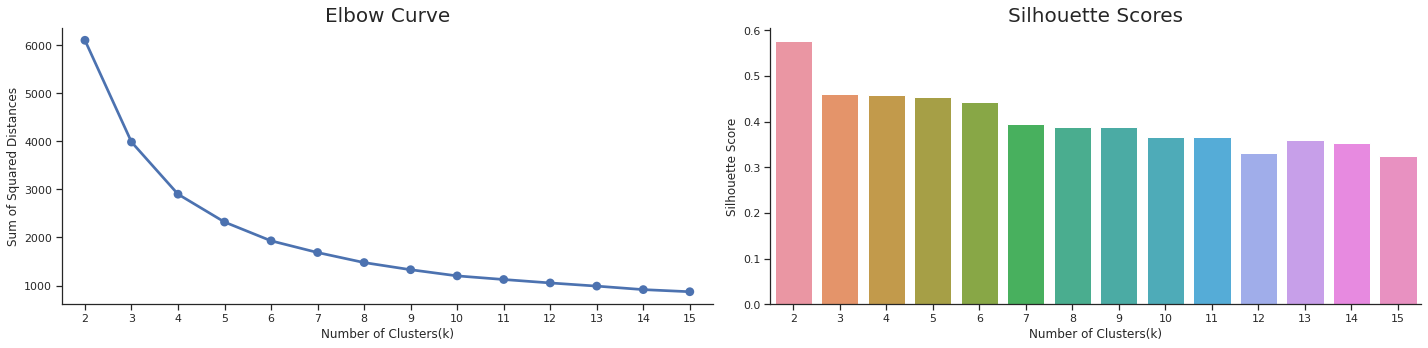

In [56]:
# Copy dataframe for K Means Algorithm
rfm = RFM_df.copy(deep = True)

# Create a list to store sum of squared distances and Silhouette Scores 
ssd   = []
score = []

# Setting the figure Size
plt.figure(figsize=(20,5))
# Number of clusters
clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(rfm[target])                                # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Storing the inertia
    score.append(silhouette_score(rfm[target], y_preds))                        # Storing the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                      
sns.pointplot(x=clusters, y=ssd)          
plt.xlabel('Number of Clusters(k)')       
plt.ylabel('Sum of Squared Distances')    
plt.title('Elbow Curve', {'fontsize': 20})

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                      
sns.barplot(x=clusters, y=score)          
plt.xlabel('Number of Clusters(k)')       
plt.ylabel('Silhouette Score')            
plt.title('Silhouette Scores', {'fontsize': 20})
plt.tight_layout()

It is a clustering algorithm, it is applied on the recency, frequency, and monetary columns. Using the Elbow and Silhouette it is concluded that 4 clusters will be the best choice.

#### Creating Clusters

In [160]:
# Copy dataframe for K Means Algorithm
rfm = RFM_df.copy(deep = True)

# Create Clusters
clusterer = KMeans(n_clusters = 4, init= 'k-means++', max_iter= 1000, random_state=100)
rfm['cluster'] = clusterer.fit_predict(rfm[target])

#### Visualization and Statistics

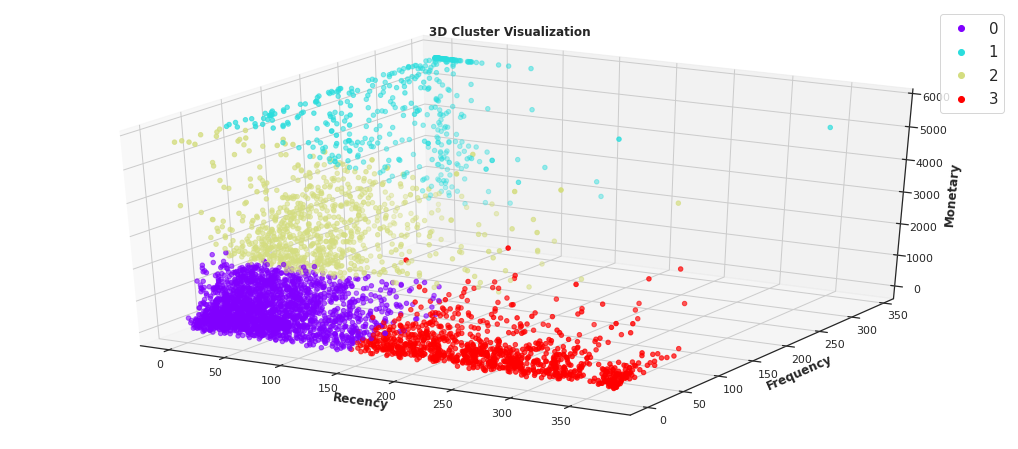

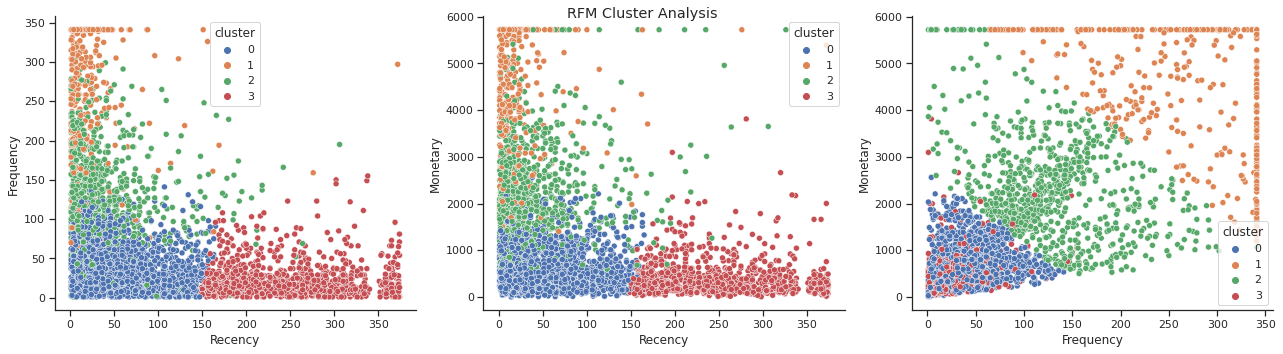

In [137]:
# Plot 3D visualization 
Three_D_Plot(Recency = rfm[Actual].iloc[:, 0], Frequency= rfm[Actual].iloc[:, 1], Monetary= rfm[Actual].iloc[:, 2], y=rfm['cluster'])

# Plot 2D Charts
Plot_3subplots(rfm)

In [138]:
# Get descriptive statistics 
rfm_stats = rfm[Actual+['cluster']].groupby('cluster').agg({Confidence_Interval_75,Median, 'count', Mean})
rfm_stats.rename(columns = {'Confidence_Interval_75': '75% Confidence Interval'}, inplace =True)
# Print it using style function
display(rfm_stats.style.set_table_styles(List_of_style_for_table))

#### Segmentation using RFM Score

In [161]:
# Cluster Mapping for Ranking/RFM Score
Recency_Mapping   = {0:2, 1:2, 2:2, 3:1}
Frequency_Mapping = {0:1, 1:3, 2:2, 3:1}
Monetary_Mapping  = {0:1, 1:3, 2:2, 3:1}

# Create R, F, M score column using mapping 
rfm['R']   = rfm['cluster'].replace(Recency_Mapping)
rfm['F'] = rfm['cluster'].replace(Frequency_Mapping)
rfm['M']  = rfm['cluster'].replace(Monetary_Mapping)

# Finding the RFM Group for each customer by combining the factors R,Fand M
# rfm['RFM'] = 10*rfm['R'] + 1*rfm['F']
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str)+ rfm['M'].astype(str)

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

# Segmentation
seg_map = {"111" : "Hibernating",
           "211" : "Promising/New Customers",
           "222" : "Potential loyalists",
           "233" : "Champions"}

rfm['segment'] = rfm['RFM'].replace(seg_map)

#### Segment Visualization and Conclusion

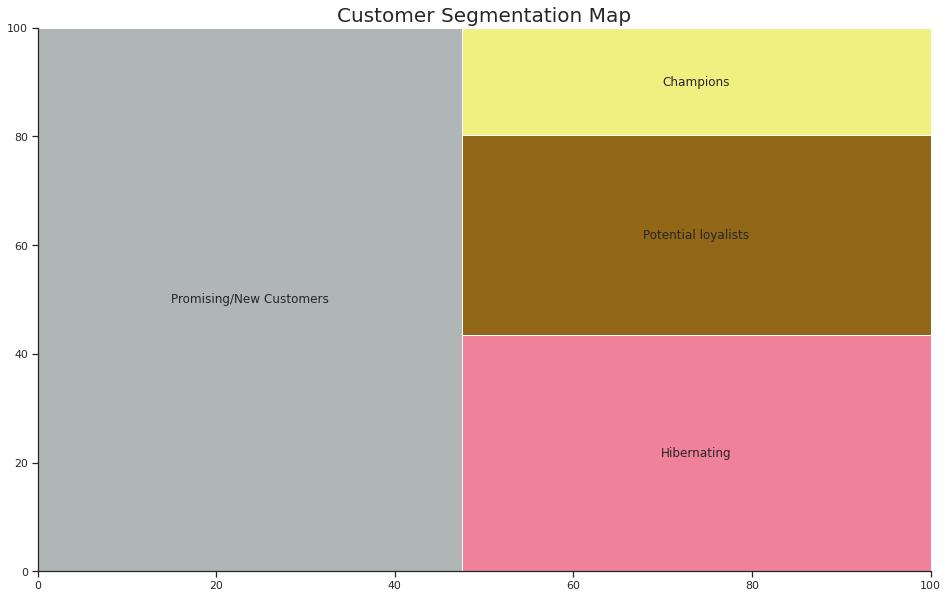

In [162]:
# Plot the segmentation Map
segration_map(rfm)

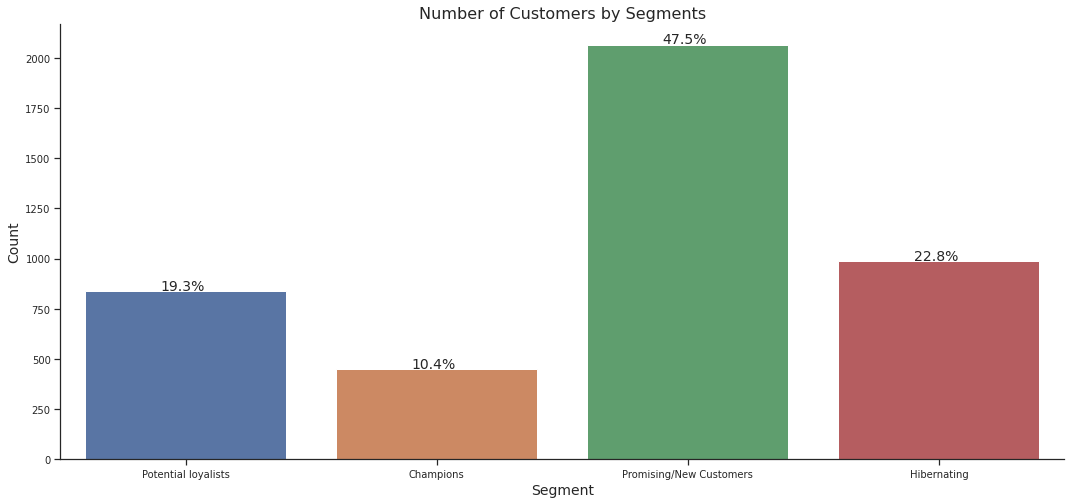

In [163]:
# Visualize the Number of customers by Segments
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm, x = 'segment')
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.10
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

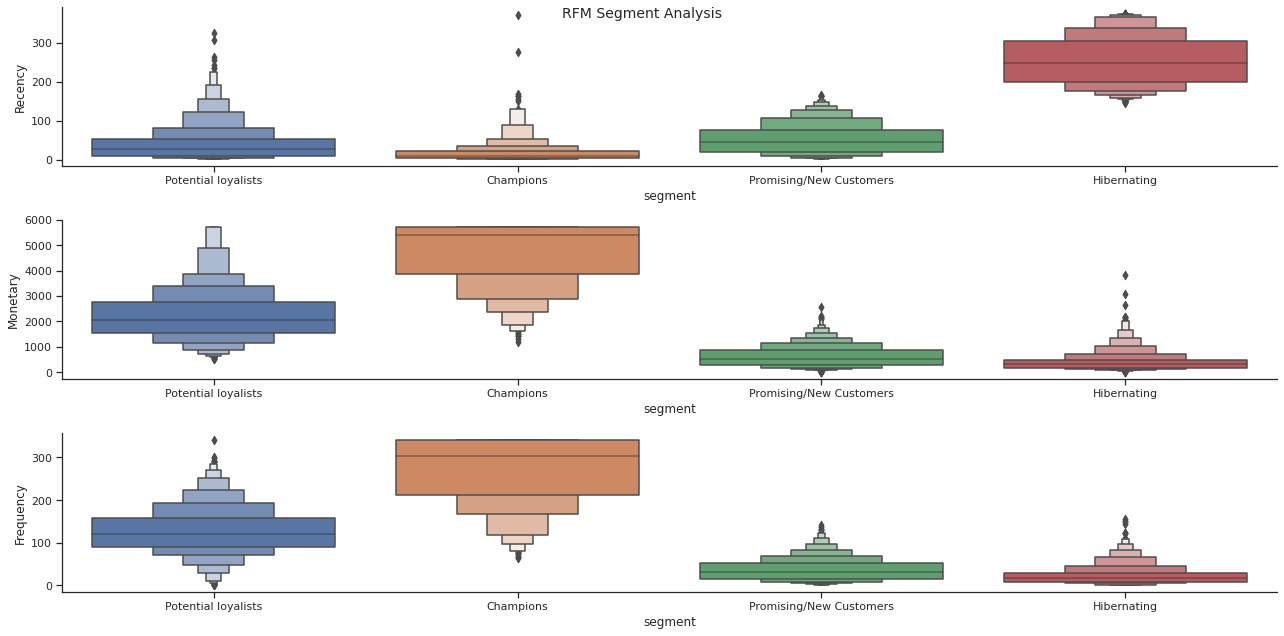

In [164]:
# Visualize the distribution of Segments
fig, axes = plt.subplots(3, 1, figsize = (18, 9))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['Recency', 'Monetary', 'Frequency']
for idx, col in enumerate(feature_list):
    sns.boxenplot(ax = axes[idx], data = rfm, x = 'segment', y = feature_list[idx])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

In [165]:
# Get descriptive statistics of final segments
rfm_stats = rfm[Actual+['segment']].groupby('segment').agg({Confidence_Interval_75, 'count', Mean})
rfm_stats.rename(columns = {'Confidence_Interval_75': '75% Confidence Interval'}, inplace =True)
# Print it using style function
Conclusion_report['K-Means'] = rfm_stats.style.set_table_styles(List_of_style_for_table)
display(Conclusion_report['K-Means'])

### **Hierarchical Clustering**

#### Evaluation

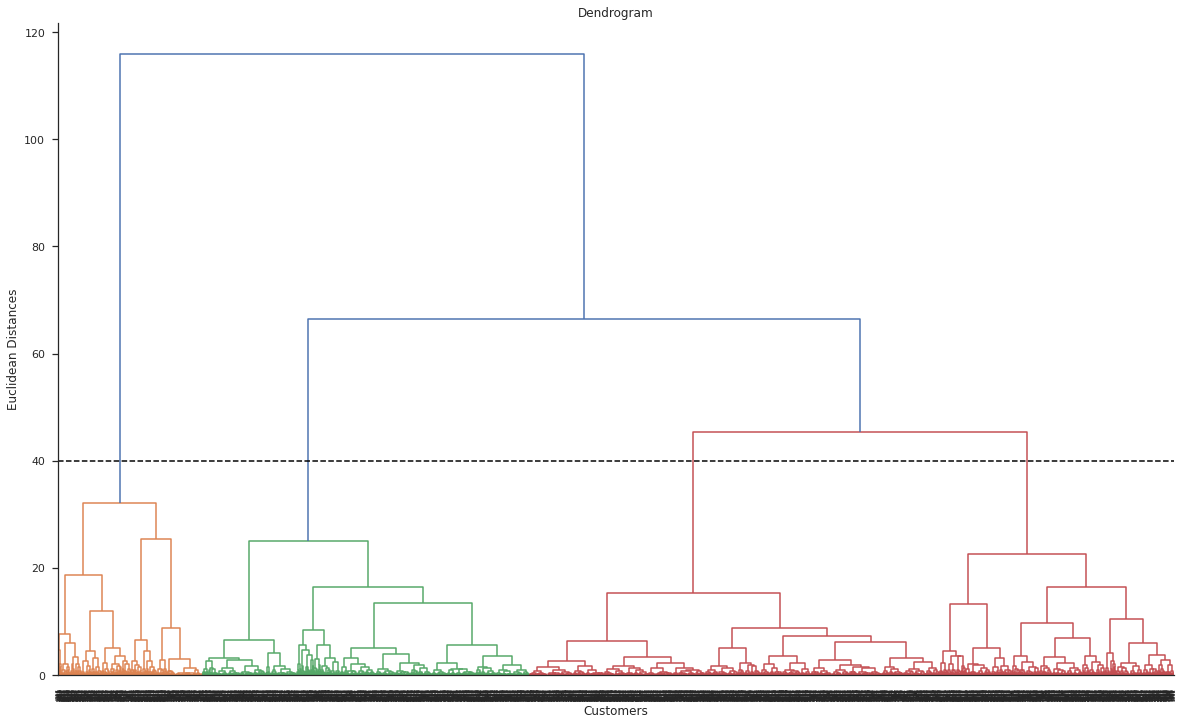

In [ ]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12))                         # Setting the figure size
dendrogram(linkage(rfm[target], method='ward'), color_threshold=50)   # using ward linkage 
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=40, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

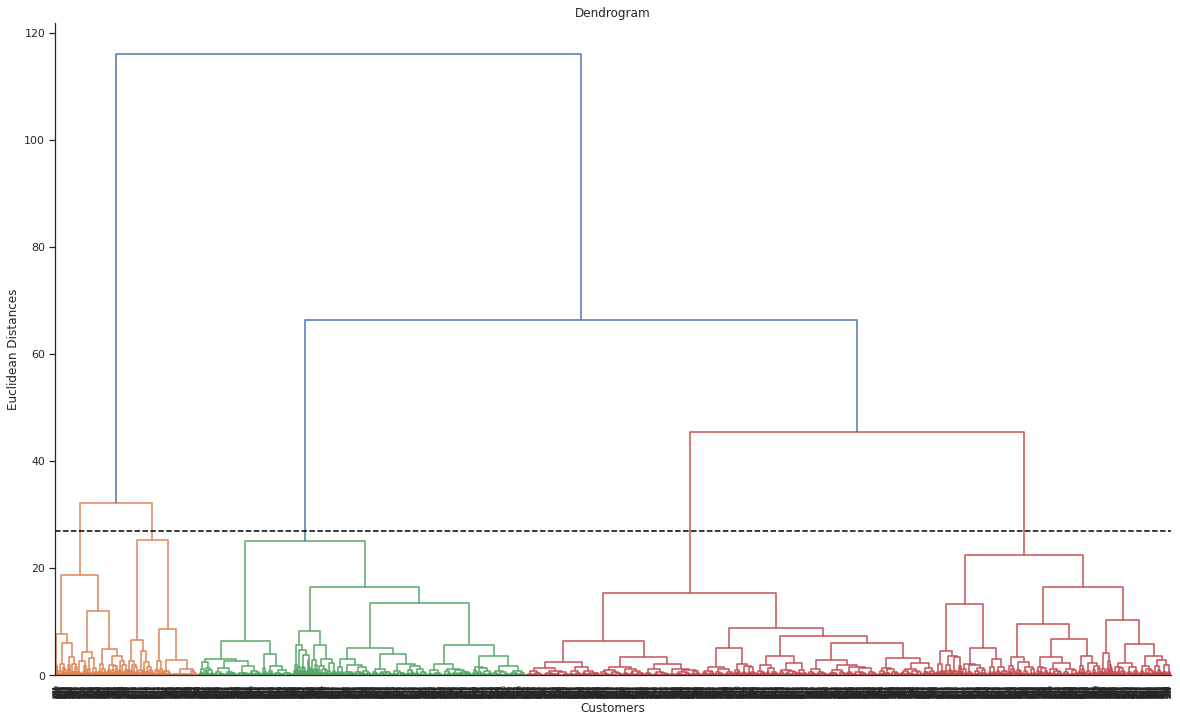

In [59]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12))                         # Setting the figure size
dendrogram(linkage(rfm[target], method='ward'), color_threshold=50)   # using ward linkage 
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=27, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

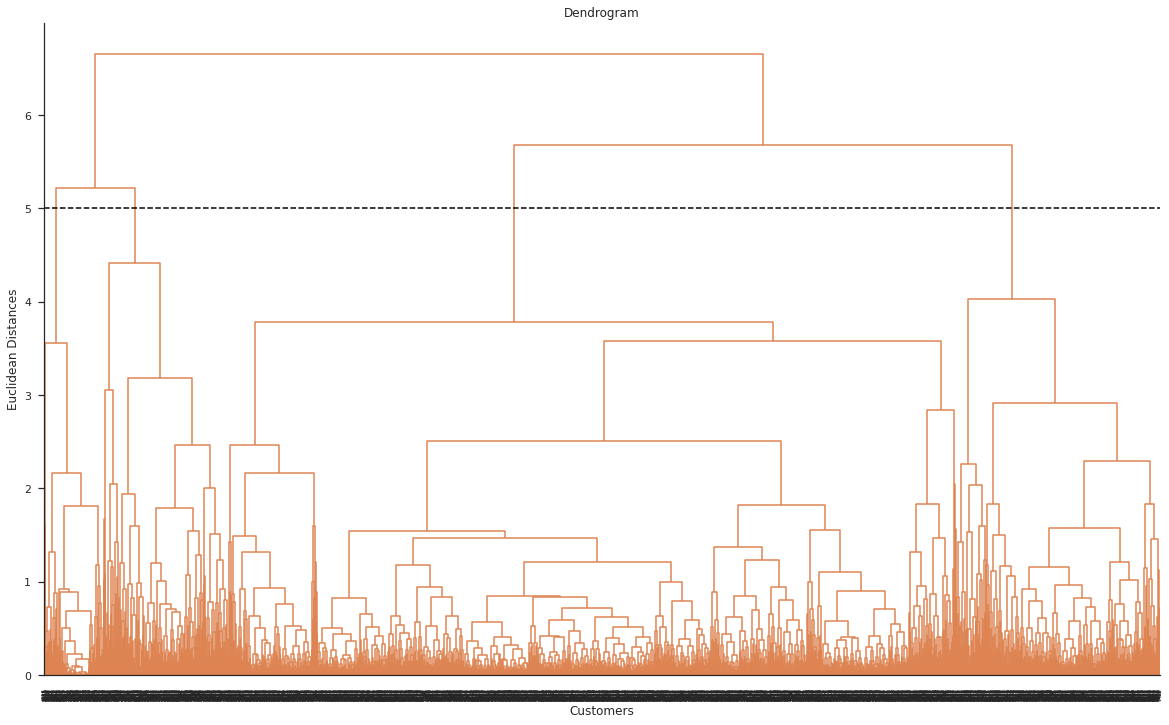

In [ ]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12))                         # Setting the figure size
dendrogram(linkage(rfm[target], method='complete'), color_threshold=50)   # using complete linkage
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=5, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

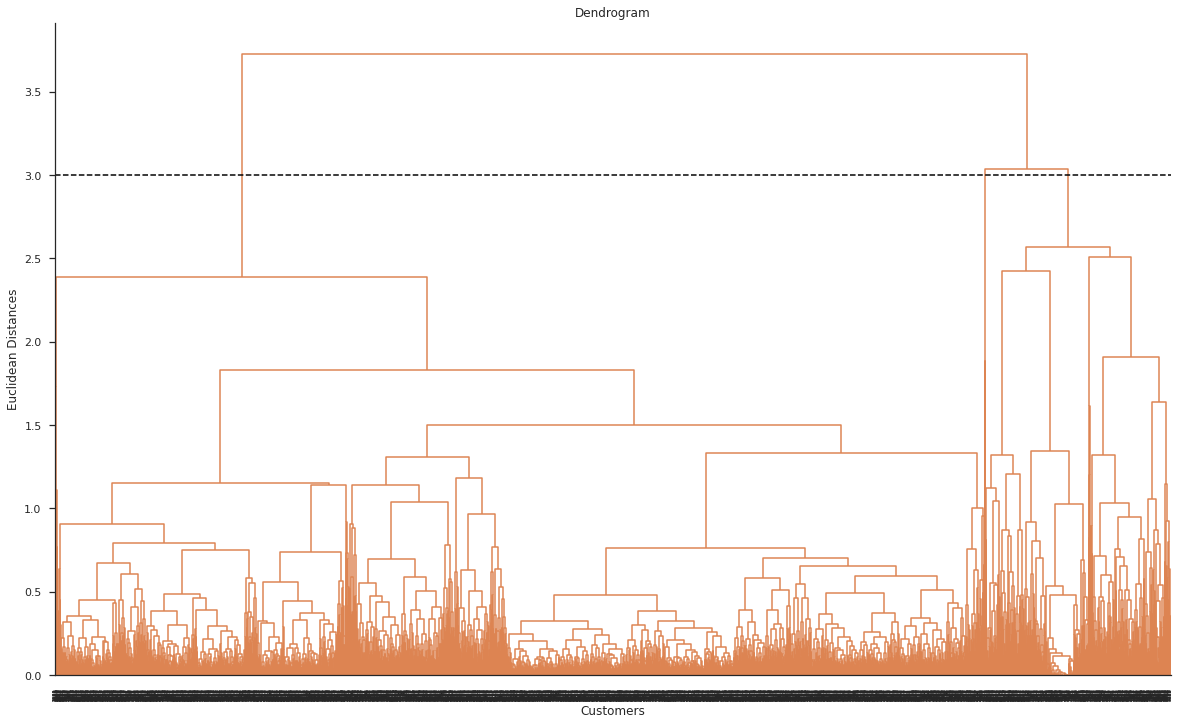

In [ ]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12))                         # Setting the figure size
dendrogram(linkage(rfm[target], method='average'), color_threshold=50)   # using average linkage 
plt.title('Dendrogram')                             # Setting the title
plt.xlabel('Customers')                             # Setting the x label
plt.ylabel('Euclidean Distances')                   # Setting y label
plt.axhline(y=3, color='black', linestyle='--')     # Setting the axis line for y=50

plt.show()

#### Creating Clusters

In [66]:
# Copy dataframe for Hierarchical Clustering
rfm = RFM_df.copy(deep = True)

# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 40
model = AgglomerativeClustering(n_clusters = None, distance_threshold=27, affinity='euclidean', linkage='ward')     
# Fitting and predicting the model
rfm['cluster'] = model.fit_predict(rfm[target])

Here dendrograms with ward, complete, and average linkages are used to determine the appropriate number of clusters. The vertical distance with ward linkage is the highest therefore five segments are created.

#### Visualization and Statistics

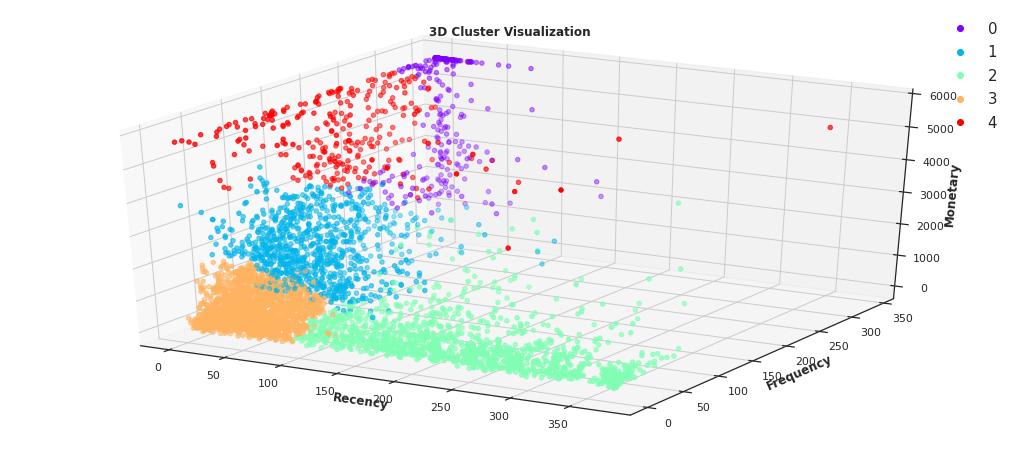

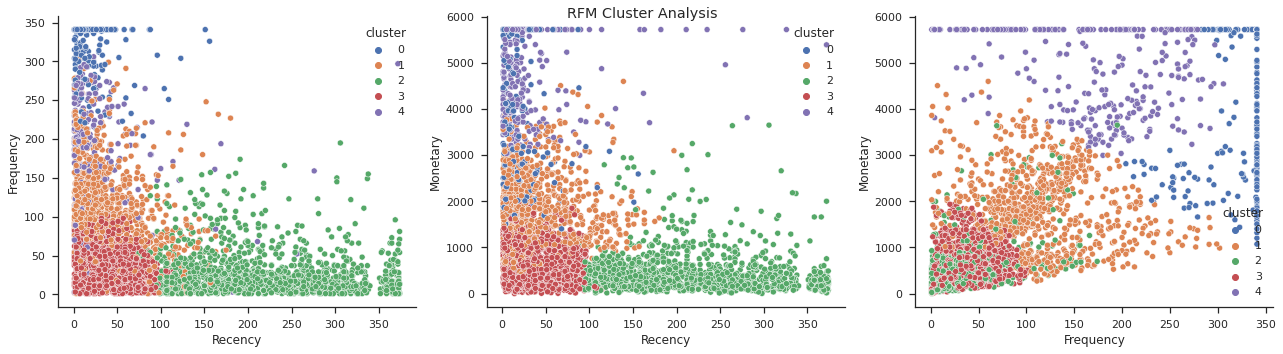

In [ ]:
# Plot 3D visualization 
Three_D_Plot(Recency = rfm[Actual].iloc[:, 0], Frequency= rfm[Actual].iloc[:, 1], Monetary= rfm[Actual].iloc[:, 2], y=rfm['cluster'])

# Plot 2D Charts
Plot_3subplots(rfm) 

In [ ]:
# Get descriptive statistics 
rfm_stats = rfm[Actual+['cluster']].groupby('cluster').agg({Confidence_Interval_75,Median, 'count', Mean})
rfm_stats.rename(columns = {'Confidence_Interval_75': '75% Confidence Interval'}, inplace =True)
# Print it using style function  
display(rfm_stats.style.set_table_styles(List_of_style_for_table))

#### Segmentation using RFM Score

In [168]:
# Cluster Mapping for Ranking/RFM Score
Recency_Mapping   = {0:2, 1:2, 2:1, 3:2, 4:2}
Frequency_Mapping = {0:3, 1:2, 2:1, 3:1, 4:2}
Monetary_Mapping  = {0:3, 1:2, 2:1, 3:1, 4:3}

# Create R, F, M score column using mapping 
rfm['R']   = rfm['cluster'].replace(Recency_Mapping)
rfm['F'] = rfm['cluster'].replace(Frequency_Mapping)
rfm['M']  = rfm['cluster'].replace(Monetary_Mapping)

# Finding the RFM Group for each customer by combining the factors R,Fand M
# rfm['RFM'] = 10*rfm['R'] + 1*rfm['F']
rfm['RFM'] = (rfm['R'].astype(str) + rfm['F'].astype(str)) + rfm['M'].astype(str)

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

# Segmentation
seg_map = {"111" : "Hibernating",
           "211" : "Promising/New Customers",
           "222" : "Potential loyalists",
           "223" : "Loyal Customers",
           "233" : "Champions"}

rfm['segment'] = rfm['RFM'].replace(seg_map)

#### Segment Visualization and Conclusion

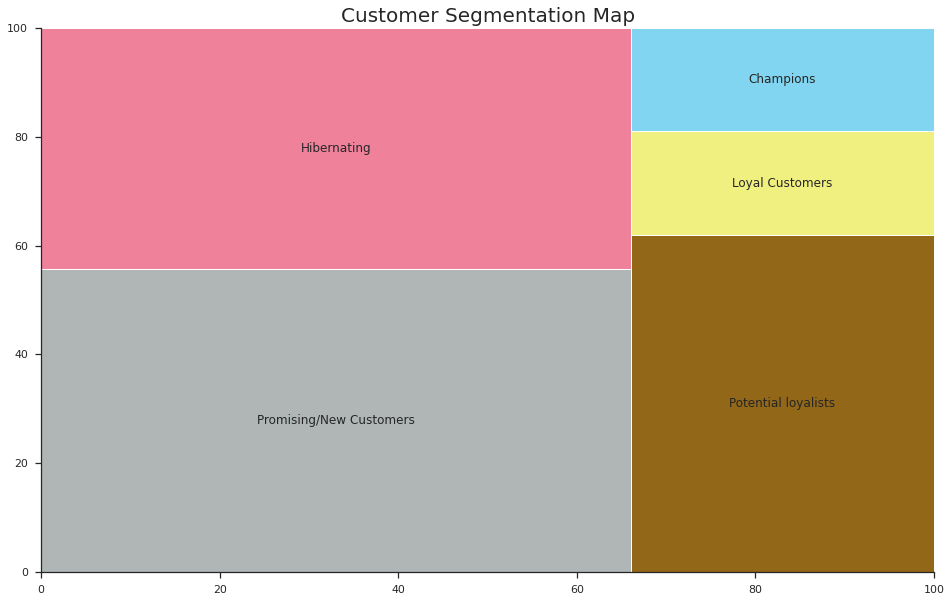

In [ ]:
# Plot the segmentation Map
segration_map(rfm)

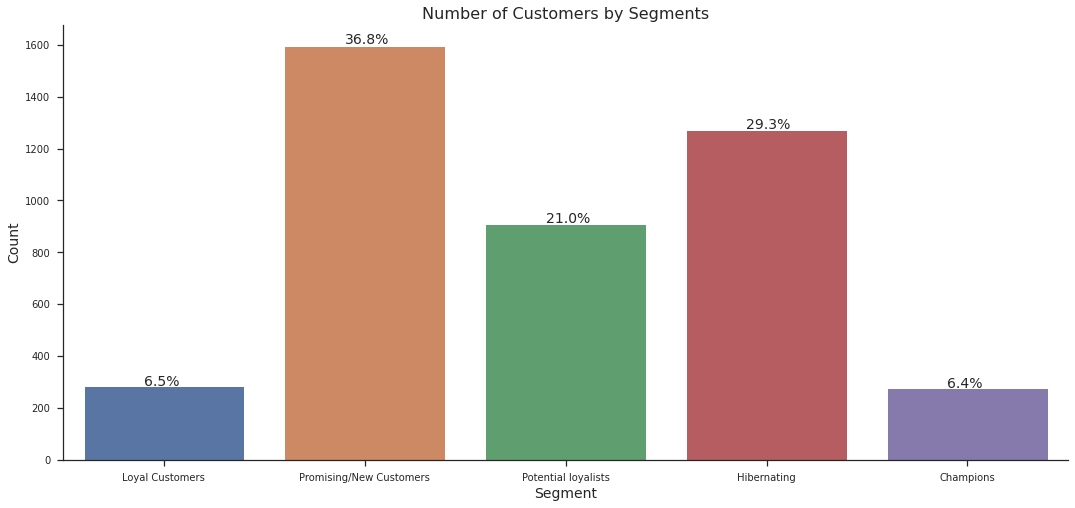

In [ ]:
# Visualize the Number of customers by Segments
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm, x = 'segment')
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.10
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

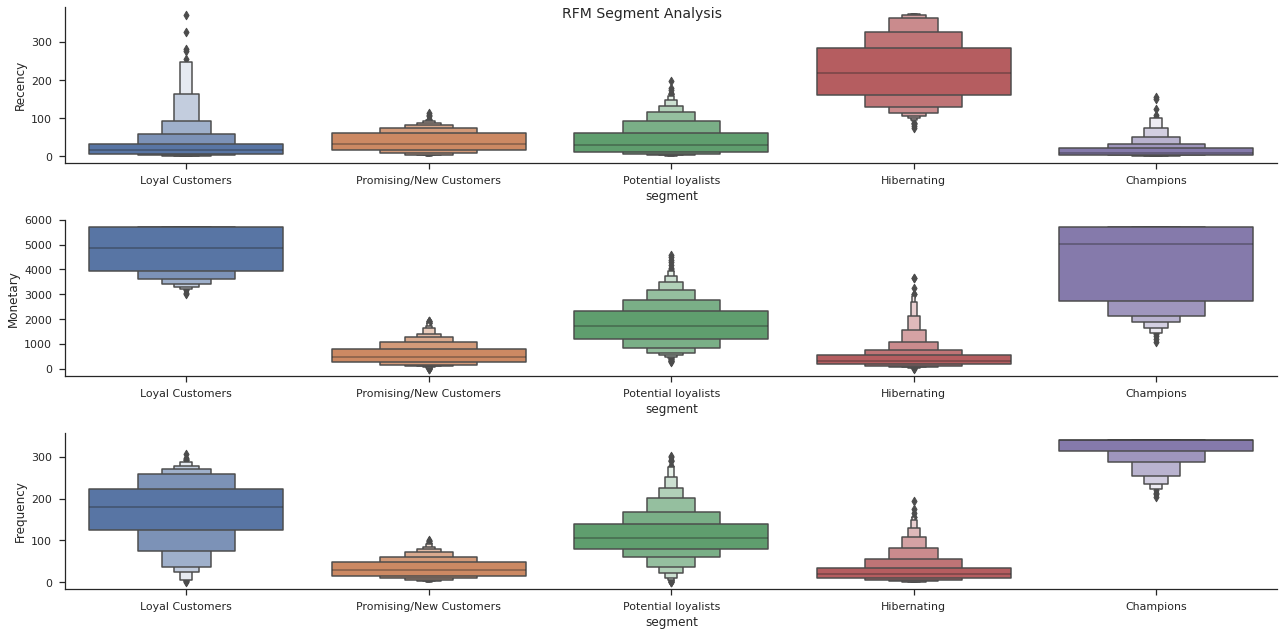

In [ ]:
# Visualize the distribution of Segments
fig, axes = plt.subplots(3, 1, figsize = (18, 9))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['Recency', 'Monetary', 'Frequency']
for idx, col in enumerate(feature_list):
    sns.boxenplot(ax = axes[idx], data = rfm, x = 'segment', y = feature_list[idx])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

In [169]:
# Get descriptive statistics of final segments
rfm_stats = rfm[Actual+['segment']].groupby('segment').agg({Confidence_Interval_75, 'count', Mean})
rfm_stats.rename(columns = {'Confidence_Interval_75': '75% Confidence Interval'}, inplace =True)
# Print it using style function
Conclusion_report['Hierarchical'] = rfm_stats.style.set_table_styles(List_of_style_for_table)
display(Conclusion_report['Hierarchical'])

### **Spectral Clustering**

#### Creating Clusters

In [170]:
# Copy dataframe for K Means Algorithm
rfm = RFM_df.copy(deep = True)

# Fitting SpectralClustering 
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=7, assign_labels='discretize', random_state=0, affinity = 'nearest_neighbors').fit(rfm[target])
rfm['cluster'] = clustering.labels_

From our intuition and visual representation, we find that 7 clusters will be the best choice here. 

#### Visualization and Statistics

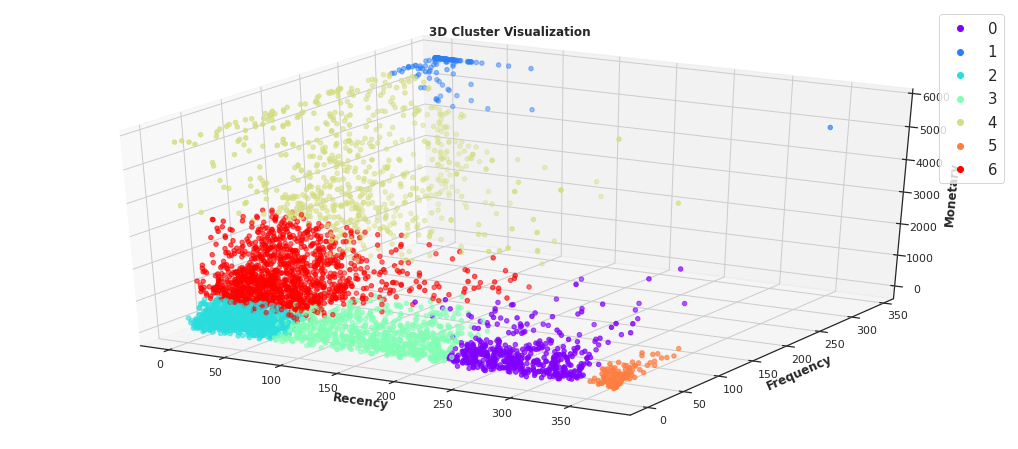

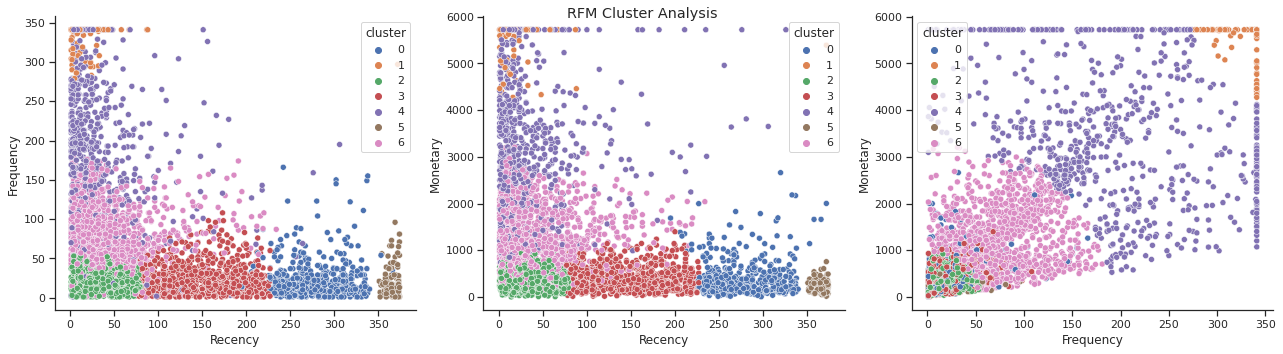

In [83]:
# Plot 3D visualization 
Three_D_Plot(Recency = rfm[Actual].iloc[:, 0], Frequency= rfm[Actual].iloc[:, 1], Monetary= rfm[Actual].iloc[:, 2], y=rfm['cluster'])

# Plot 2D Charts
Plot_3subplots(rfm)

In [84]:
# Get descriptive statistics 
rfm_stats = rfm[Actual+['cluster']].groupby('cluster').agg({Confidence_Interval_75,Median, 'count', Mean})
rfm_stats.rename(columns = {'Confidence_Interval_75': '75% Confidence Interval'}, inplace =True)
# Print it using style function
display(rfm_stats.style.set_table_styles(List_of_style_for_table))

#### Segmentation using RFM Score

In [171]:
# Cluster Mapping for Ranking/RFM Score
Recency_Mapping   = {0:2, 1:4, 2:4, 3:3, 4:4, 5:1, 6:4}
Frequency_Mapping = {0:1, 1:4, 2:1, 3:1, 4:3, 5:1, 6:2}
Monetary_Mapping  = {0:1, 1:4, 2:1, 3:1, 4:3, 5:1, 6:2}

# Create R, F, M score column using mapping 
rfm['R']   = rfm['cluster'].replace(Recency_Mapping)
rfm['F'] = rfm['cluster'].replace(Frequency_Mapping)
rfm['M']  = rfm['cluster'].replace(Monetary_Mapping)

# Finding the RFM Group for each customer by combining the factors R,Fand M
# rfm['RFM'] = 10*rfm['R'] + 1*rfm['F']
rfm['RFM'] = (rfm['R'].astype(str) + rfm['F'].astype(str)+ rfm['M'].astype(str))

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

# Segmentation
seg_map = {"111" : "Hibernating",
           "211" : "About to Sleep",
           "311" : "Promising",
           "411" : "New Customers",
           "422" : "Potential loyalists",
           "433" : "Potential loyalists",
           "444" : "Champions"}

rfm['segment'] = rfm['RFM'].replace(seg_map)

#### Segment Visualization and Conclusion

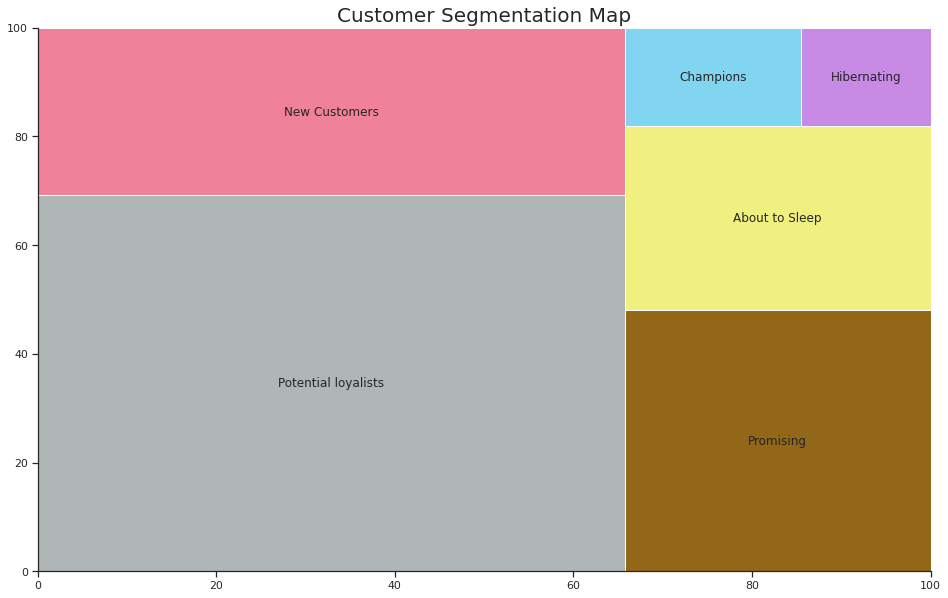

In [172]:
# Plot the segmentation Map
segration_map(rfm)

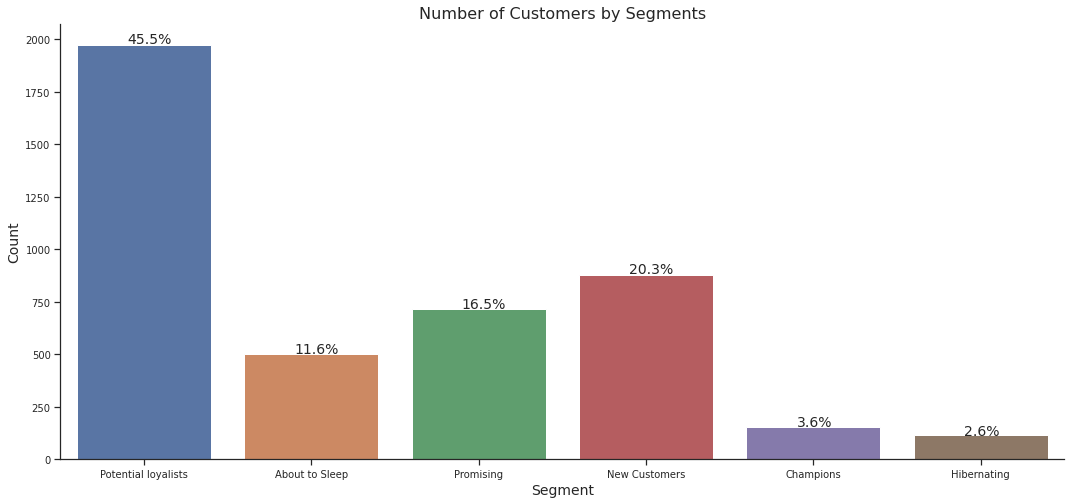

In [94]:
# Visualize the Number of customers by Segments
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm, x = 'segment')
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.10
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

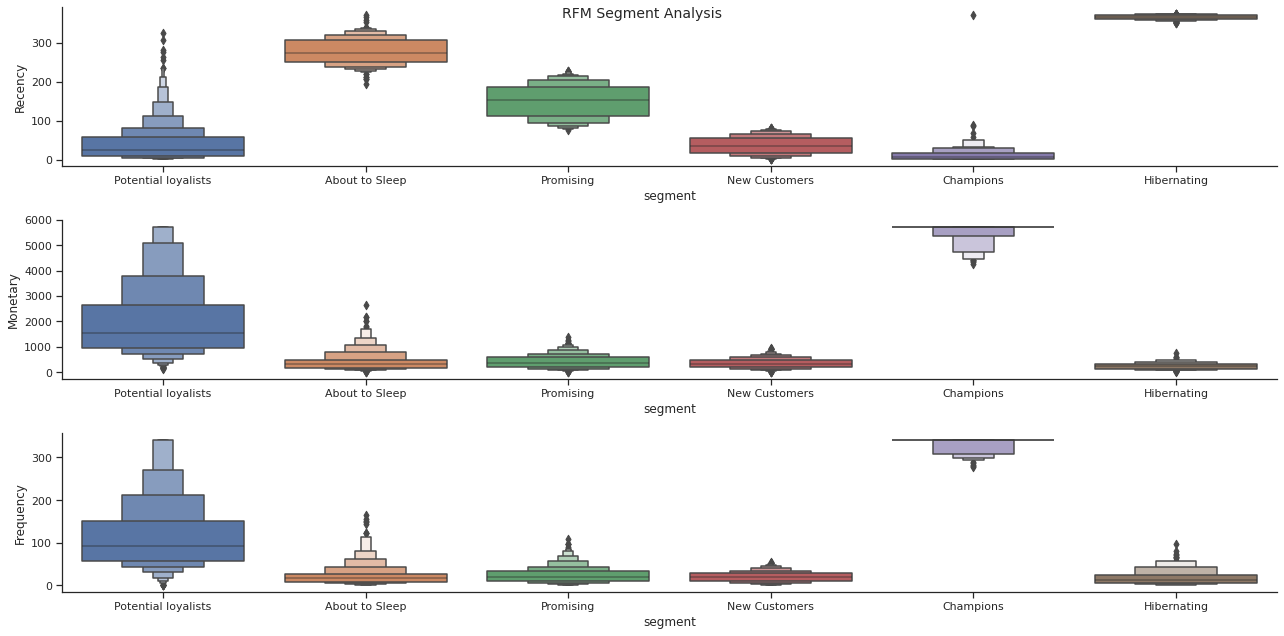

In [95]:
# Visualize the distribution of Segments
fig, axes = plt.subplots(3, 1, figsize = (18, 9))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['Recency', 'Monetary', 'Frequency']
for idx, col in enumerate(feature_list):
    sns.boxenplot(ax = axes[idx], data = rfm, x = 'segment', y = feature_list[idx])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

In [173]:
# Get descriptive statistics of final segments
rfm_stats = rfm[Actual+['segment']].groupby('segment').agg({Confidence_Interval_75, 'count', Mean})
rfm_stats.rename(columns = {'Confidence_Interval_75': '75% Confidence Interval'}, inplace =True)
# Print it using style function
Conclusion_report['Spectral'] = rfm_stats.style.set_table_styles(List_of_style_for_table)
display(Conclusion_report['Spectral'])

## <font size="+2.5" color='#144c5c'><b>  <u>Conclusion </u>
1.	The simple quantile cut gives 10 customer segments. The segments of quantile cut are about to sleep, at risk, can’t lose, champion, hibernating, loyal customers, need attention, new customers, potential loyalists, and promising.
2.	The k-Means cluster gives 4 customer segments. The segments are champions, hibernating, potential loyalists, and promising/new customers.
3.	The hierarchical cluster gives 5 customer segments. The segments are champions, hibernating, loyal customers, potential loyalists, and promising/new customers.
4.	The spectral cluster gives 6 customer segments. The segments are about to sleep, champions, hibernating, new customers, potential loyalists, and promising.
5.	Business can use these customer segments to target customers based on their segment behavior. For example, customers that belong to hibernating are low spenders and low frequent, and they ordered products long time ago. Company can reconnect with them by recommending popular products, discounts, and offers.
6.	Customers from About to sleep segment are low spenders and low frequent and they ordered products not so long ago, company can offer appropriate offers to avoid loss of these customers.
7.	Customers from champions segment buy products frequently and recently and they are responsible for maximum revenue. Company must hear their voice, become personalized with them, and reward them.
8.	Potential loyalists buy products at moderate frequency and they ordered very recently. Loyal customers are those who buy products very frequently and are responsible for generating maximum profit to company, they are responsive to promotions.

The final conclusion report for each approach is displayed below.

In [180]:
# Display the Conclusion_report for segments created by quantile cut approach
Conclusion_report['Quantile cut'] 

In [183]:
# Display the Conclusion_report for segments created by k-means approach
Conclusion_report['K-Means']

In [182]:
# Display the Conclusion_report for segments created by Hierarchical approach
Conclusion_report['Hierarchical']

In [181]:
# Display the Conclusion_report for segments created by Spectral approach
Conclusion_report['Spectral']